In [1]:
import requests
import lyricsgenius
from bs4 import BeautifulSoup
import re
import requests
from pathlib import Path
from collections import Counter
import pandas as pd
import csv
import numpy as np
import time
from langdetect import detect
from langdetect import detect_langs
import os
import matplotlib.pyplot as plt
from scipy import interpolate
import seaborn as sns
from collections import defaultdict
from lexical_diversity import lex_div as ld
import nltk
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import gensim

In [2]:
client_access_token  = 
LyricsGenius = lyricsgenius.Genius(client_access_token)

## Fetch artists

In [2]:
kotimaiset_artistit_list = []
ulkomaiset_artistit_list = []

In [3]:
url_warner = "https://warnermusic.fi/artistit/#kotimaiset"

response_warner = requests.get(url_warner)
html_string_warner = response_warner.text
document_warner = BeautifulSoup(html_string_warner, "html.parser")

In [4]:
url_sony = "https://sonymusic.fi/artists/"

response_sony = requests.get(url_sony)
html_string_sony = response_sony.text
document_sony = BeautifulSoup(html_string_sony, "html.parser")

In [5]:
url_universal = "https://www.universalmusic.fi/artists/"

response_universal = requests.get(url_universal)
html_string_universal = response_universal.text
document_universal = BeautifulSoup(html_string_universal, "html.parser")

In [6]:
subdoc = document_warner.find_all("div")[20]
tags_all = subdoc.find_all("div")[0::4][1:]

for tag in tags_all:
    if "lozad category-kotimaiset artist-item" in str(tag):
        kotimaiset_artistit_list.append(tag.text.strip())

In [7]:
tags_all = document_sony.find_all("article")

for tag in tags_all:
    if tag["data-target"] == 'group-kotimaiset-artistit':
        name = tag.find(attrs={"class":"artist-name"})
        kotimaiset_artistit_list.append(name.text.strip())

In [8]:
tags = document_universal.find_all("article", attrs={"class":"tag-kotimainen"})

for tag in tags:
    name = tag.find("h2").text
    kotimaiset_artistit_list.append(name)

In [26]:
with open('kotimaiset_artistis.txt', 'w') as file:
    for item in kotimaiset_artistit_list:
        file.write(item + '\n')

len(kotimaiset_artistit_list)

250

In [10]:
subdoc = document_warner.find_all("div")[20]
tags_all = subdoc.find_all("div")[0::4][1:]

for tag in tags_all:
    if "lozad category-ulkomaiset artist-item" in str(tag):
        ulkomaiset_artistit_list.append(tag.text.strip())

###

tags_all = document_sony.find_all("article")
for tag in tags_all:
    if tag["data-target"] == 'group-ulkomaiset-artistit':
        name = tag.find(attrs={"class":"artist-name"})
        ulkomaiset_artistit_list.append(name.text.strip())

###

tags = document_universal.find_all("article", attrs={"class":"tag-ulkomainen"})
for tag in tags:
    name = tag.find("h2").text
    ulkomaiset_artistit_list.append(name)

In [27]:
with open('ulkomaiset_artistis.txt', 'w') as file:
    for item in ulkomaiset_artistit_list:
        file.write(item + '\n')

len(ulkomaiset_artistit_list)

315

## Get albums

In [85]:
for vuosi in range(1995, 2024):
    for viikko in range(1,53):
        url = f"https://www.ifpi.fi/lista/albumit/{vuosi}/{viikko}/"

In [129]:
vuosi = 2015
viikko = 10
url = f"https://www.ifpi.fi/lista/albumit/{vuosi}/{viikko}/"

response = requests.get(url)
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [147]:
# album_df = pd.DataFrame(columns=['artist', 'title', 'label'])

# for vuosi in range(1995, 2024):
#     for viikko in range(1,53):
#         url = f"https://www.ifpi.fi/lista/albumit/{vuosi}/{viikko}/"

#         response = requests.get(url)
#         html_string = response.text
#         document = BeautifulSoup(html_string, "html.parser")

#         tags = document.find_all(attrs={"class":"chart-row"})

#         for tag in tags:

#             artist = tag.find(attrs={"class":"chart-artist"}).text.strip()
#             title = tag.find(attrs={"class":"chart-title"}).text.strip()
#             label = tag.find(attrs={"class":"chart-label"}).text.strip()

#             album_df.loc[len(album_df.index)] = [artist, title, label]

#         print(f"{vuosi}/{viikko} DONE")

# album_df.to_json("album_df.json")

1995/1 DONE
1995/2 DONE
1995/3 DONE
1995/4 DONE
1995/5 DONE
1995/6 DONE
1995/7 DONE
1995/8 DONE
1995/9 DONE
1995/10 DONE
1995/11 DONE
1995/12 DONE
1995/13 DONE
1995/14 DONE
1995/15 DONE
1995/16 DONE
1995/17 DONE
1995/18 DONE
1995/19 DONE
1995/20 DONE
1995/21 DONE
1995/22 DONE
1995/23 DONE
1995/24 DONE
1995/25 DONE
1995/26 DONE
1995/27 DONE
1995/28 DONE
1995/29 DONE
1995/30 DONE
1995/31 DONE
1995/32 DONE
1995/33 DONE
1995/34 DONE
1995/35 DONE
1995/36 DONE
1995/37 DONE
1995/38 DONE
1995/39 DONE
1995/40 DONE
1995/41 DONE
1995/42 DONE
1995/43 DONE
1995/44 DONE
1995/45 DONE
1995/46 DONE
1995/47 DONE
1995/48 DONE
1995/49 DONE
1995/50 DONE
1995/51 DONE
1995/52 DONE
1996/1 DONE
1996/2 DONE
1996/3 DONE
1996/4 DONE
1996/5 DONE
1996/6 DONE
1996/7 DONE
1996/8 DONE
1996/9 DONE
1996/10 DONE
1996/11 DONE
1996/12 DONE
1996/13 DONE
1996/14 DONE
1996/15 DONE
1996/16 DONE
1996/17 DONE
1996/18 DONE
1996/19 DONE
1996/20 DONE
1996/21 DONE
1996/22 DONE
1996/23 DONE
1996/24 DONE
1996/25 DONE
1996/26 DONE
1996

### Filters

In [72]:
etunimet_miehet = pd.read_excel("./etunimitilasto-2023-08-01-dvv.xlsx", sheet_name="Miehet kaikki")["Etunimi"].tolist()[:2000]
etunimet_naiset = pd.read_excel("./etunimitilasto-2023-08-01-dvv.xlsx", sheet_name="Naiset kaikki")["Etunimi"].tolist()[:2000]

In [39]:
sukunimet = pd.read_excel("./sukunimitilasto-2023-08-01-dvv.xlsx")["Sukunimi"].tolist()

In [180]:
sanat_suomi = pd.read_xml("./kotus-sanalista_v1/kotus-sanalista_v1.xml")["s"].tolist()

In [208]:
words_english = pd.read_csv("unigram_freq.csv")

In [209]:
words_english = words_english["word"][:100000].tolist()

In [134]:
words_english = [str(s) for s in words_english]

In [217]:
words_english_strict = words_english[:20000]

In [226]:
words_english_strict = [word for word in words_english_strict if word not in sanat_suomi]

In [211]:
sanat_suomi_tiukka = [word for word in sanat_suomi if word not in words_english]

### Countries

In [3]:
album_df_read = pd.read_json("album_df.json")
album_df_read.drop_duplicates(inplace=True)

In [4]:
album_df = album_df_read.copy()
album_df["label"] = album_df["label"].apply(lambda x: x.split("/"))
album_df["label"] = album_df["label"].apply(lambda x: [s.strip() for s in x])
album_df["album_id"] = album_df.index

album_df = album_df[["album_id", "artist", "title", "label"]]

# album_df["country"] = np.where(album_df["artist"].apply(lambda x: any(ele in x.split() for ele in etunimet_miehet)), "FI", "--")
# album_df["country"] = np.where(album_df["artist"].apply(lambda x: any(ele in x.split() for ele in etunimet_naiset)), "FI", album_df["country"])
# album_df["country"] = np.where(album_df["artist"].apply(lambda x: any(ele in x.split() for ele in sukunimet)), "FI", album_df["country"])

# # album_df.loc[:,"country"] = np.where(album_df["title"].apply(lambda x: any(ele in x.lower().split() for ele in words_english)), "EN", album_df["country"])
# album_df.loc[:,"country"] = np.where(album_df["title"].apply(lambda x: any(ele in x.lower() for ele in sanat_suomi)), "FI", album_df["country"])
# album_df.loc[:,"country"] = np.where(album_df["title"].apply(lambda x: any(ele in x.lower().split() for ele in words_english_strict)), "EN", album_df["country"])

# album_df["country"] = np.where(album_df["label"].apply(lambda x: any("Finland" in s for s in x)), "FI", album_df["country"])
# album_df["country"] = np.where(album_df["artist"].apply(lambda x: x in kotimaiset_artistit_list), "FI", album_df["country"])
# album_df["country"] = np.where(album_df["artist"].apply(lambda x: x in ulkomaiset_artistit_list), "EN", album_df["country"])

album_df

album_id                  artist  \
0             0                Bon Jovi   
1             1           The Offspring   
2             2  Leevi and the Leavings   
3             3            Scatman John   
4             4                Movetron   
...         ...                     ...   
65641     65641       The Coffinshakers   
65646     65646            Shade Empire   
65651     65651             Danko Jones   
65657     65657                  Mitski   
65669     65669            Brian Setzer   

                                        title  \
0                                  These Days   
1                                       Smash   
2                         Rakkauden planeetta   
3                             Scatman's World   
4                              Romeo ja Julia   
...                                       ...   
65641               Graves, Release Your Dead   
65646                                 Sunholy   
65651                         Electric Sounds   
65657  The Land Is Inhospitable And So Are We   
65669               The Devil Always Collects   

                                            label  
0                             [Mercury, Polygram]  
1                    [Epitaph, Spinefarm Records]  
2                                       [Pyramid]  
3                                [Iceberg, K-Tel]  
4                             [Polydor, Polygram]  
...                                           ...  
65641                [Svart Records, The Orchard]  
65646  [Candlelight Music Group, pias Uk Limited]  
65651            [AFM Records, Supersounds Music]  
65657              [Dead Oceans, sc Distribution]  
65669                  [Surfdog Records, iip-Dds]  

[8523 rows x 4 columns]

In [5]:
artistlist = album_df["artist"].unique().tolist()

## Get sample lyrics

In [6]:
# lyricsample_df = pd.DataFrame(columns=["artist", "sample"])
lyricsample_df = pd.read_json("lyricsample_df.json")

In [171]:
# for a in artistlist[len(lyricsample_df.index-1):]:
#     try:    
#         artist = LyricsGenius.search_artist(a, max_songs=1)

#         lyrics = artist.songs[0].lyrics
#         text = lyrics.splitlines()

#         artist_name = str(artist).replace(", 1 song", "")

#         lyricsample_df.loc[len(lyricsample_df.index)] = [artist_name, text]
#         lyricsample_df.to_json("lyricsample_df.json")

#         progress = round(len(lyricsample_df.index)/2992*100, 1)
#         # time.sleep(5)
#         print(f"PROGRESS: {progress}%")

#     except:
#         lyricsample_df.loc[len(lyricsample_df.index)] = [np.nan, np.nan]

### Sample language

In [172]:
lyricsample_df.dropna(inplace=True)
album_df.rename(columns={"artist":"artist_est"}, inplace=True)
lyricsample_df.rename(columns={"artist":"artist_real"}, inplace=True)

lyricsample_df["artist_lower"] = lyricsample_df["artist_real"].apply(lambda x: x.lower())
album_df["artist_lower"] = album_df["artist_est"].apply(lambda x: x.lower())

album_df = album_df.merge(lyricsample_df, how="outer")
album_df.fillna("--", inplace=True)

In [218]:
album_df = album_df[album_df["artist_est"]!="--"][album_df["artist_real"]!="--"]
album_df

C:\Users\pyryp\AppData\Local\Temp\ipykernel_9708\715334903.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  album_df = album_df[album_df["artist_est"]!="--"][album_df["artist_real"]!="--"]


album_id      artist_est                              title  \
0         0.0        Bon Jovi                         These Days   
1        38.0        Bon Jovi  Cross Road - The Best Of Bon Jovi   
2      9991.0        Bon Jovi                              Crush   
3     11996.0        Bon Jovi    One Wild Night - Live 1985-2001   
4     14832.0        Bon Jovi                             Bounce   
...       ...             ...                                ...   
9818  64778.0  Emma & Matilda       Siellä On Kaikki Niin Ihanaa   
9819  64806.0     Sleep Token               Take Me Back To Eden   
9823  64896.0      Alessandra          Queen Of Kings (Complete)   
9825  64968.0         Extreme                                Six   
9827  65575.0    Olli Halonen                       Olli Halonen   

                                                  label    artist_lower  \
0                                   [Mercury, Polygram]        bon jovi   
1                                   [Mercury, Polygram]        bon jovi   
2                                  [Mercury, Universal]        bon jovi   
3                                   [Island, Universal]        bon jovi   
4                                   [Island, Universal]        bon jovi   
...                                                 ...             ...   
9818         [Warner Music Finland, Warner Music Group]  emma & matilda   
9819                     [Spinefarm, PIAS  UK  Limited]     sleep token   
9823        [Universal Music As, Universal Music Group]      alessandra   
9825                [Ear Music, Playground, playground]         extreme   
9827  [Warner Music Finland, Mökkitie Records, Warne...    olli halonen   

         artist_real                                             sample  
0           Bon Jovi  [[Intro], Once upon a time, not so long ago, ,...  
1           Bon Jovi  [[Intro], Once upon a time, not so long ago, ,...  
2           Bon Jovi  [[Intro], Once upon a time, not so long ago, ,...  
3           Bon Jovi  [[Intro], Once upon a time, not so long ago, ,...  
4           Bon Jovi  [[Intro], Once upon a time, not so long ago, ,...  
...              ...                                                ...  
9818  Emma & Matilda  [Aamun hämärässä itket vaan kun kuulet sisäpih...  
9819     Sleep Token  [[Verse 1], I dream in phosphorescence, Bleed ...  
9823      Alessandra  [[Chorus], She, queen of the kings, Runnin' so...  
9825         Extreme  [[Verse 1], Saying "I love you", Is not the wo...  
9827    Olli Halonen  [[Intro], Aluks oli suo, kuokka ja Jussi, Ja p...  

[8032 rows x 7 columns]

In [220]:
album_df["artist"] = album_df["artist_real"]
album_df.drop(columns=["artist_est", "artist_lower", "artist_real"], inplace=True)
album_df

album_id                              title  \
0         0.0                         These Days   
1        38.0  Cross Road - The Best Of Bon Jovi   
2      9991.0                              Crush   
3     11996.0    One Wild Night - Live 1985-2001   
4     14832.0                             Bounce   
...       ...                                ...   
9818  64778.0       Siellä On Kaikki Niin Ihanaa   
9819  64806.0               Take Me Back To Eden   
9823  64896.0          Queen Of Kings (Complete)   
9825  64968.0                                Six   
9827  65575.0                       Olli Halonen   

                                                  label  \
0                                   [Mercury, Polygram]   
1                                   [Mercury, Polygram]   
2                                  [Mercury, Universal]   
3                                   [Island, Universal]   
4                                   [Island, Universal]   
...                                                 ...   
9818         [Warner Music Finland, Warner Music Group]   
9819                     [Spinefarm, PIAS  UK  Limited]   
9823        [Universal Music As, Universal Music Group]   
9825                [Ear Music, Playground, playground]   
9827  [Warner Music Finland, Mökkitie Records, Warne...   

                                                 sample          artist  
0     [[Intro], Once upon a time, not so long ago, ,...        Bon Jovi  
1     [[Intro], Once upon a time, not so long ago, ,...        Bon Jovi  
2     [[Intro], Once upon a time, not so long ago, ,...        Bon Jovi  
3     [[Intro], Once upon a time, not so long ago, ,...        Bon Jovi  
4     [[Intro], Once upon a time, not so long ago, ,...        Bon Jovi  
...                                                 ...             ...  
9818  [Aamun hämärässä itket vaan kun kuulet sisäpih...  Emma & Matilda  
9819  [[Verse 1], I dream in phosphorescence, Bleed ...     Sleep Token  
9823  [[Chorus], She, queen of the kings, Runnin' so...      Alessandra  
9825  [[Verse 1], Saying "I love you", Is not the wo...         Extreme  
9827  [[Intro], Aluks oli suo, kuokka ja Jussi, Ja p...    Olli Halonen  

[8032 rows x 5 columns]

In [314]:
artist_df = album_df.drop_duplicates("artist").reset_index(drop=True)
artist_df["sample"] = artist_df["sample"].apply(lambda x: " ".join(str(e) for e in x))
artist_df["sample"] = artist_df["sample"].astype(str)

artist_df["sample"] = artist_df["sample"].apply(lambda x: x.replace("["," "))
artist_df["sample"] = artist_df["sample"].apply(lambda x: x.replace("]"," "))
artist_df["sample"] = artist_df["sample"].apply(lambda x: x.replace("Intro"," "))
artist_df["sample"] = artist_df["sample"].apply(lambda x: x.replace("Verse"," "))
artist_df["sample"] = artist_df["sample"].apply(lambda x: x.replace("Chorus"," "))
artist_df["sample"] = artist_df["sample"].apply(lambda x: x.replace("Instrumental"," "))


# artist_df["country"] = artist_df["sample"].apply(lambda x: detect(x.strip()))
artist_df

album_id                         title  \
0         0.0                    These Days   
1         1.0                         Smash   
2         2.0           Rakkauden planeetta   
3         3.0               Scatman's World   
4         4.0                Romeo ja Julia   
...       ...                           ...   
2029  64778.0  Siellä On Kaikki Niin Ihanaa   
2030  64806.0          Take Me Back To Eden   
2031  64896.0     Queen Of Kings (Complete)   
2032  64968.0                           Six   
2033  65575.0                  Olli Halonen   

                                                  label  \
0                                   [Mercury, Polygram]   
1                          [Epitaph, Spinefarm Records]   
2                                             [Pyramid]   
3                                      [Iceberg, K-Tel]   
4                                   [Polydor, Polygram]   
...                                                 ...   
2029         [Warner Music Finland, Warner Music Group]   
2030                     [Spinefarm, PIAS  UK  Limited]   
2031        [Universal Music As, Universal Music Group]   
2032                [Ear Music, Playground, playground]   
2033  [Warner Music Finland, Mökkitie Records, Warne...   

                                                 sample  \
0         Once upon a time, not so long ago     1  T...   
1       : Def Leppard  Gunter glieben glauten globen...   
2      Säkeistö 1  Itkisitkö onnesta, jos panisin su...   
3         Ska-badabadabadoo-belidabbelydabbladabblad...   
4     Puutarhan Veronan kauneimman Kanssas nähdä sai...   
...                                                 ...   
2029  Aamun hämärässä itket vaan kun kuulet sisäpiha...   
2030     1  I dream in phosphorescence Bleed through...   
2031      She, queen of the kings Runnin' so fast, b...   
2032     1  Saying "I love you" Is not the words I w...   
2033      Aluks oli suo, kuokka ja Jussi Ja pohjoist...   

                      artist  
0                   Bon Jovi  
1              The Offspring  
2     Leevi And The Leavings  
3               Scatman John  
4                   Movetron  
...                      ...  
2029          Emma & Matilda  
2030             Sleep Token  
2031              Alessandra  
2032                 Extreme  
2033            Olli Halonen  

[2034 rows x 5 columns]

In [300]:
artist_lang_df = pd.DataFrame(columns=["artist", "country"])
for i in artist_df.index:
    try:
        artist = artist_df.loc[i,"artist"]
        sample = artist_df.loc[i,"sample"]
        sample = str(sample.strip())
        lang = detect(sample)

        artist_lang_df.loc[i] = [artist, lang]
    except:
        None


In [311]:
artist_lang_df.loc[artist_lang_df["artist"]=="Sielun Veljet", "country"] = "fi"

In [320]:
album_df["album_id"] = album_df["album_id"].astype(int)
album_df.merge(artist_lang_df)[["album_id", "artist", "title", "label", "sample", "country"]].to_json("album_df_country.json")

In [7]:
album_df_country = pd.read_json("album_df_country.json")
album_df_fi = album_df_country[album_df_country["country"]=="fi"].drop_duplicates(["album_id"]).sort_values(by="artist").reset_index(drop=True)
album_df_fi

album_id          artist                               title  \
0        30893  2 Times Terror             Equals One Sudden Death   
1        26002        51koodia                      Mustat sydämet   
2        20878        51koodia                    Rautaiset linnut   
3        17559        51koodia                             Nimetty   
4        17931       @junkmail                         Karu totuus   
...        ...             ...                                 ...   
2206     24153         YÖLintu                      Haavoittumaton   
2207      7723         YÖLintu  Tositarkoituksella (Platinapainos)   
2208     19752         YÖLintu                     Mennyttä miestä   
2209      7139         YÖLintu              Tositarkoituksella - F   
2210     18122       Åttopojat                       Aatetta jaloa   

                           label  \
0             [Playground Music]   
1                          [EMI]   
2              [Herodes, Warner]   
3                 [Herodes, EMI]   
4     [Good Son, Rock Frequency]   
...                          ...   
2206              [Warner Music]   
2207   [F-Records, Warner Music]   
2208               [WEA, Warner]   
2209     [Records, Warner Music]   
2210                      [Edel]   

                                                 sample country  
0     [Ihoni on läpinäkyvä ja kylmä*, Näen sisäelime...      fi  
1     [Missä kasvaa se puu, Joka ylpeenä kantaa, Vah...      fi  
2     [Missä kasvaa se puu, Joka ylpeenä kantaa, Vah...      fi  
3     [Missä kasvaa se puu, Joka ylpeenä kantaa, Vah...      fi  
4     ["Ei koskaan enään. Arvet sydämeen siitä ikuis...      fi  
...                                                 ...     ...  
2206  [(Verse), Oli naisia nuoria tansseissa pilvinp...      fi  
2207  [(Verse), Oli naisia nuoria tansseissa pilvinp...      fi  
2208  [(Verse), Oli naisia nuoria tansseissa pilvinp...      fi  
2209  [(Verse), Oli naisia nuoria tansseissa pilvinp...      fi  
2210  [[Chorus], Savolainen nainen puhe hunajainen, ...      fi  

[2211 rows x 6 columns]

In [17]:
# album_df_fi.groupby("artist")["title"].count().reset_index().sort_values(by="title", ascending=False).head(20)

## Get album lyrics

In [8]:
def clean_up(song_title):

    if "Ft" in song_title:
        try:
            before_ft_pattern = re.compile(".*(?=\(Ft)")
            song_title_before_ft = before_ft_pattern.search(song_title).group(0)
        except:
            song_title_before_ft = song_title.split("Ft")

        clean_song_title = song_title_before_ft.strip()
        clean_song_title = clean_song_title.replace("/", "-")
    
    else:
        song_title_no_lyrics = song_title.replace("Lyrics", "")
        clean_song_title = song_title_no_lyrics.strip()
        clean_song_title = clean_song_title.replace("/", "-")
    
    return clean_song_title

In [9]:
def to_html(string):
    string = string.replace(" ", "-")
    string = string.replace("/", "-")
    string = string.replace("?", "")
    string = string.replace("ä", "a")
    string = string.replace("ö", "o")

    return string

In [10]:
def get_all_songs_from_album(artist, album_name):
    
    artist = to_html(artist)
    album_name = to_html(album_name)
    
    response = requests.get(f"https://genius.com/albums/{artist}/{album_name}")
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
    song_title_tags = document.find_all("h3", attrs={"class": "chart_row-content-title"})
    song_titles = [song_title.text for song_title in song_title_tags]

    metadata = document.find_all("div", attrs={"class":"header_with_cover_art-primary_info_container"})[0]
    julkaisuvuosi = metadata.find(attrs={"class":"metadata_unit"}).string[-4:]
    
    clean_songs = []
    for song_title in song_titles:
        clean_song = clean_up(song_title)
        clean_songs.append(clean_song)
        
    return clean_songs, julkaisuvuosi

In [11]:
def download_album_lyrics(artist, album_name): 
    
    LyricsGenius = lyricsgenius.Genius(client_access_token)
    LyricsGenius.remove_section_headers = True
    
    clean_songs, julkaisuvuosi = get_all_songs_from_album(artist, album_name)
    
    for song in clean_songs:
        
        song_object = LyricsGenius.search_song(song, artist)
        
        if song_object != None:
            
            artist_title = to_html(artist)
            album_title = to_html(album_name)
            song_title = to_html(song)
            
            custom_filename=f"lyrics/{artist_title}_{album_title}_{julkaisuvuosi}/{song_title}"
            
            Path(f"lyrics/{artist_title}_{album_title}_{julkaisuvuosi}").mkdir(parents=True, exist_ok=True)
            
            song_object.save_lyrics(filename=custom_filename, extension='txt', sanitize=False)
        
        #If the song doesn't contain lyrics
        else:
            print(f'{song}: No lyrics')

In [12]:
# failed_df = pd.DataFrame(columns=["artist", "title"])
failed_df = pd.read_json("failed_df.json")

In [14]:
# for i in album_df_fi.index[2195:]:
#     try:
#         artist = album_df_fi.loc[i,"artist"].strip()
#         title = album_df_fi.loc[i,"title"].strip()
#         download_album_lyrics(artist, title)
#         progress = round(i/2211*100, 2)
#         print(f"PROGRESS: {progress}%, i={i}")
#     except:
#         failed_df.loc[len(failed_df.index)] = [artist, title]
#         failed_df.to_json("failed_df.json")

# Word analysis

In [2]:
directory_path = 'Gettomasa_Vastustamaton/'

In [3]:
def split_into_words(any_chunk_of_text):
    lowercase_text = any_chunk_of_text.lower()
    split_words = re.split("\W+", lowercase_text)
    return split_words 

In [4]:
stopwords = []

In [5]:
def get_most_frequent_words_directory(directory_path):
    
    number_of_desired_words = 50
    meaningful_words_tally = Counter()
    
    for filepath in Path(directory_path).glob('*.txt'):
            full_text = open(filepath, encoding="utf-8").read()
            all_the_words = split_into_words(full_text)
            meaningful_words = [word for word in all_the_words if word not in stopwords]
            meaningful_words_tally.update(meaningful_words)
    
    most_frequent_meaningful_words = meaningful_words_tally.most_common(number_of_desired_words)

    return most_frequent_meaningful_words

In [6]:
def get_most_frequent_words_string(string, n_words=200):
    
    number_of_desired_words = n_words
    meaningful_words_tally = Counter()
    
    all_the_words = split_into_words(string)
    meaningful_words = [word for word in all_the_words if word not in stopwords]
    meaningful_words_tally.update(meaningful_words)
    
    most_frequent_meaningful_words = meaningful_words_tally.most_common(number_of_desired_words)

    return most_frequent_meaningful_words

In [7]:
# lyrics_df = pd.DataFrame(columns=["artist", "song_title", "year", "lyrics"])

In [8]:
# for album_path in os.listdir("./lyrics"):
#     release_year = album_path[-4:]
#     artist = album_path.split("_")[0]
#     title = album_path.split("_")[1]
    
#     for song_file in os.listdir(f"lyrics/{album_path}/"):
#         with open(f"lyrics/{album_path}/{song_file}") as text:
#             lyrics_string = text.read()
            
#             lyrics_df.loc[len(lyrics_df.index)] = [artist, title, release_year, lyrics_string]

In [9]:
# # lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: " ".join(str(e) for e in x))
# lyrics_df["lyrics"] = lyrics_df["lyrics"].astype(str)

# lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: x.replace("\n"," "))
# lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: x.replace("\""," "))
# lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: x.replace("["," "))
# lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: x.replace("]"," "))
# lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: x.replace("Intro"," "))
# lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: x.replace("Verse"," "))
# lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: x.replace("Chorus"," "))
# lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: x.replace("Instrumental"," "))
# lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: x.replace("Säkeistö"," "))
# lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: x.replace("Kertosäe"," "))

In [10]:
# for i in lyrics_df.index:
#     try:
#         sample = lyrics_df.loc[i, "lyrics"]
#         lang = detect(sample)
#         lyrics_df.loc[i, "lang"] = lang
#     except:
#         lyrics_df.loc[i, "lang"] = "--"

In [11]:
# lyrics_df = lyrics_df[lyrics_df["lang"]=="fi"]

In [12]:
# lyrics_df.to_json("lyrics_df.json")

### Most common words

In [13]:
lyrics_df = pd.read_json("lyrics_df.json")
lyrics_df["lyrics"] = lyrics_df["lyrics"].apply(lambda x: x.lower())
lyrics_df["lyrics"] = lyrics_df["lyrics"].replace(".", "")
lyrics_df["lyrics"] = lyrics_df["lyrics"].replace(",", "")

In [14]:
lyrics_df_grouped = lyrics_df.groupby("year")["lyrics"].apply(" ".join).reset_index()
lyrics_df_grouped

year                                             lyrics
0   1972  ja tuittu ruusut sai ja kirjeen luki nimenkin ...
1   1978  näino en tiedä mitään ihanampaa kuin peiliä ka...
2   1980  anna et saa haaveistasi tehdä vankilaa anna tu...
3   1982  eksynyttä, älä hae eksynyttä lammasta metsästä...
4   1983  verta ja ruusuja ajatus piikit silmissä ajatus...
5   1985  aurinko laskee selkäsi taa se värjää sun hiuks...
6   1986  vein pesukoneen, vein lastenrattaat kähmin lap...
7   1988  afrikka tuo manner alla julman auringon tällä ...
8   1989  sinä halusit mulle näyttää sun hotellihuoneen ...
9   1990  teen viikot työtä vuorotta ja jokaisen pennin ...
10  1991  kuin kampela veneen pohjalla kiinni verkossa h...
11  1992  tämän maan lapsi suomalaisessa kodissaan katse...
12  1993  vannoa voisin että murhaan tuon veikon joka ke...
13  1994  elämän keskipäivässä minäkin eksyin synkkään m...
14  1995  lämmin ilta maalattu suu mansikalta mm maistuu...
15  1996  luulin, kaikki lopussa on luulin, olen voimato...
16  1997  ensimmäinen syksyn sade kastoi koko maan satee...
17  1998  onnellinen olla mä saan tänään yksin nyt jäin,...
18  1999  pienen kylän nuoret rakastuvat serkkuihin geen...
19  2000  ja ehdotan että pidämme häntä kotona vielä vuo...
20  2001  nipistä mua tästä onnen täyttämästä elämästä l...
21  2002  jos jätän muovipussin lattialle pyörimään siih...
22  2003  eilen vasta kolmas tapaaminen sovittiin ja mol...
23  2004  en tiedä mitään en miks ilmeesi on aivan erila...
24  2005  ei, en tahdo tulla kotiin en voi, vaikka tahto...
25  2006  niin valoisat yöt ja tuulet rakkaimman maan tä...
26  2007  milloin opin huomaamaan kun toinen uppoaa ja o...
27  2008  hei, oletko yksi heistä joka eksyi maailmaan, ...
28  2009  mä tahdon vonkaa, beibi tahdon vonkaa mä oon k...
29  2010  haureudessa rypenyt vartalo karttaa laulua kun...
30  2011  olet syntymästäsi kuollut vain raihnas itselle...
31  2012  olen kasvanut kiveen kiinni tämän sellin seini...
32  2013  yo, junttien nemesis, anti-frederik helmut lok...
33  2014  lentohiekkaa vaikka silmiini mä saan matkoilla...
34  2015  ne on mun kintereil, ne mua hiillostaa ykkös t...
35  2016  konfliktin riski alkaa taas liidellä kun astui...
36  2017    a-i-vo-vu a-i-vo-vu a-i-vo-vu a-i-vo-vu koit...
37  2018  pystyn ennustaa sunnuntaiaamuna sun vierestä, ...
38  2019  aamul kun meet kahvii keittelee mä jään kuunte...
39  2020  jäätiin jyrän alle siinä kyljes luki elämä se ...
40  2021  sun pitää hankkii pt älysormus sormeen killuma...
41  2022  on olohuone hetken estradi ja sen halki hyppää...
42  2023  terve, terve antti tuu peremmälle vaan lähetää...

In [15]:
lyrics_df_grouped["common words"] = lyrics_df_grouped["lyrics"].apply(get_most_frequent_words_string)
lyrics_df_grouped

year                                             lyrics  \
0   1972  ja tuittu ruusut sai ja kirjeen luki nimenkin ...   
1   1978  näino en tiedä mitään ihanampaa kuin peiliä ka...   
2   1980  anna et saa haaveistasi tehdä vankilaa anna tu...   
3   1982  eksynyttä, älä hae eksynyttä lammasta metsästä...   
4   1983  verta ja ruusuja ajatus piikit silmissä ajatus...   
5   1985  aurinko laskee selkäsi taa se värjää sun hiuks...   
6   1986  vein pesukoneen, vein lastenrattaat kähmin lap...   
7   1988  afrikka tuo manner alla julman auringon tällä ...   
8   1989  sinä halusit mulle näyttää sun hotellihuoneen ...   
9   1990  teen viikot työtä vuorotta ja jokaisen pennin ...   
10  1991  kuin kampela veneen pohjalla kiinni verkossa h...   
11  1992  tämän maan lapsi suomalaisessa kodissaan katse...   
12  1993  vannoa voisin että murhaan tuon veikon joka ke...   
13  1994  elämän keskipäivässä minäkin eksyin synkkään m...   
14  1995  lämmin ilta maalattu suu mansikalta mm maistuu...   
15  1996  luulin, kaikki lopussa on luulin, olen voimato...   
16  1997  ensimmäinen syksyn sade kastoi koko maan satee...   
17  1998  onnellinen olla mä saan tänään yksin nyt jäin,...   
18  1999  pienen kylän nuoret rakastuvat serkkuihin geen...   
19  2000  ja ehdotan että pidämme häntä kotona vielä vuo...   
20  2001  nipistä mua tästä onnen täyttämästä elämästä l...   
21  2002  jos jätän muovipussin lattialle pyörimään siih...   
22  2003  eilen vasta kolmas tapaaminen sovittiin ja mol...   
23  2004  en tiedä mitään en miks ilmeesi on aivan erila...   
24  2005  ei, en tahdo tulla kotiin en voi, vaikka tahto...   
25  2006  niin valoisat yöt ja tuulet rakkaimman maan tä...   
26  2007  milloin opin huomaamaan kun toinen uppoaa ja o...   
27  2008  hei, oletko yksi heistä joka eksyi maailmaan, ...   
28  2009  mä tahdon vonkaa, beibi tahdon vonkaa mä oon k...   
29  2010  haureudessa rypenyt vartalo karttaa laulua kun...   
30  2011  olet syntymästäsi kuollut vain raihnas itselle...   
31  2012  olen kasvanut kiveen kiinni tämän sellin seini...   
32  2013  yo, junttien nemesis, anti-frederik helmut lok...   
33  2014  lentohiekkaa vaikka silmiini mä saan matkoilla...   
34  2015  ne on mun kintereil, ne mua hiillostaa ykkös t...   
35  2016  konfliktin riski alkaa taas liidellä kun astui...   
36  2017    a-i-vo-vu a-i-vo-vu a-i-vo-vu a-i-vo-vu koit...   
37  2018  pystyn ennustaa sunnuntaiaamuna sun vierestä, ...   
38  2019  aamul kun meet kahvii keittelee mä jään kuunte...   
39  2020  jäätiin jyrän alle siinä kyljes luki elämä se ...   
40  2021  sun pitää hankkii pt älysormus sormeen killuma...   
41  2022  on olohuone hetken estradi ja sen halki hyppää...   
42  2023  terve, terve antti tuu peremmälle vaan lähetää...   

                                         common words  
0   [(ja, 27), (hän, 12), (laa, 12), (on, 9), (kun...  
1   [(ja, 72), (on, 52), (½, 30), (ne, 28), (ei, 2...  
2   [(en, 41), (mä, 30), (sua, 26), (ei, 26), (ja,...  
3   [(on, 79), (ja, 78), (ei, 53), (pelko, 53), (l...  
4   [(on, 28), (mä, 27), (en, 27), (joku, 26), (mi...  
5   [(ja, 140), (on, 113), (kun, 67), (ei, 62), (m...  
6   [(ja, 84), (kun, 32), (on, 26), (en, 23), (jok...  
7   [(ja, 129), (on, 87), (mä, 78), (kun, 73), (mi...  
8   [(ja, 31), (kun, 20), (on, 18), (vaikka, 13), ...  
9   [(ja, 146), (on, 115), (kun, 86), (ei, 39), (j...  
10  [(ja, 61), (kun, 33), (on, 25), (kaikki, 20), ...  
11  [(on, 41), (ei, 37), (ja, 36), (painajainen, 2...  
12  [(ja, 308), (on, 265), (ei, 135), (kun, 127), ...  
13  [(ja, 337), (on, 188), (ei, 141), (niin, 77), ...  
14  [(ja, 462), (on, 315), (kun, 281), (ei, 242), ...  
15  [(ja, 574), (on, 471), (kun, 290), (mä, 211), ...  
16  [(ja, 365), (on, 287), (ei, 252), (en, 231), (...  
17  [(ja, 388), (on, 317), (ei, 223), (se, 201), (...  
18  [(ja, 856), (on, 483), (mä, 425), (kun, 379), ...  
19  [(ja, 475), (on, 467), (ei, 338), (kun, 232), ...  
20  [(ja, 913), (on, 900), (ei, 675), (kun, 429), ...  

In [16]:
common_words_df = lyrics_df_grouped.explode("common words")[["year", "common words"]]
common_words_df[["word", "f"]] = common_words_df["common words"].apply(pd.Series)
common_words_df = common_words_df[["year", "word", "f"]]
common_words_df

year    word   f
0   1972      ja  27
0   1972     hän  12
0   1972     laa  12
0   1972      on   9
0   1972     kun   7
..   ...     ...  ..
42  2023    muut  35
42  2023    tiiä  35
42  2023   minne  35
42  2023    osaa  35
42  2023  silmät  35

[8600 rows x 3 columns]

#### Sanaluokat wiki

In [17]:
sanaluokat = pd.read_excel("./sanaluokkadict.xlsx")
sanaluokat["sana"] = sanaluokat["sana"].astype(str).apply(lambda x: x.strip())
# sanat_ready = sanaluokat["sana"].tolist()
# sanat_ready = [word.strip() for word in sanat_ready]
sanaluokat_dict = dict(zip(sanaluokat.sana, sanaluokat.luokka))
sanaluokat_dict

{'on': 'verbi',
 'ja': 'taipumaton',
 'ei': 'taipumaton',
 'the': 'eng',
 'mä': 'pronomini',
 'se': 'pronomini',
 'en': 'taipumaton',
 'kun': 'taipumaton',
 'and': 'eng',
 'of': 'eng',
 'mun': 'pronomini',
 'to': 'eng',
 'sä': 'pronomini',
 'mut': 'taipumaton',
 'a': 'eng',
 'et': 'taipumaton',
 'niin': 'taipumaton',
 'sun': 'pronomini',
 'ku': 'taipumaton',
 'jos': 'taipumaton',
 'oo': 'verbi',
 'i': 'eng',
 'sen': 'pronomini',
 'me': 'pronomini',
 'vaan': 'taipumaton',
 'in': 'eng',
 'oon': 'verbi',
 'mitä': 'pronomini',
 'nyt': 'taipumaton',
 'ne': 'pronomini',
 'kaikki': 'pronomini',
 'that': 'eng',
 'tää': 'taipumaton',
 'saa': 'verbi',
 'voi': 'verbi',
 'it': 'eng',
 'you': 'eng',
 'kuin': 'taipumaton',
 'mua': 'pronomini',
 'vain': 'taipumaton',
 'aina': 'taipumaton',
 'sua': 'pronomini',
 'he': 'pronomini',
 'olla': 'verbi',
 'joka': 'pronomini',
 's': 'eng',
 'taas': 'taipumaton',
 'oot': 'verbi',
 'for': 'eng',
 'vielä': 'taipumaton',
 'enää': 'taipumaton',
 'jo': 'taipumaton

In [18]:
# result_list = lyrics_df_grouped["common words"].apply(lambda x: [item[0] for item in x])
# common_words_list = [item for sublist in result_list for item in sublist]
# common_words_list = set([word for word in common_words_list if word not in sanat_ready])

# common_words_list = list(common_words_list)
# common_words_list

In [19]:
# sanaluokka_df = pd.DataFrame(columns=["sana", "luokka"])

In [20]:
# for word in common_words_list:
#     url = f"https://fi.wiktionary.org/wiki/{word}"

#     response = requests.get(url)
#     html_string = response.text
#     document = BeautifulSoup(html_string, "html.parser")

#     try:
#         sanaluokka = luokka = document.find_all(attrs={"class":"mw-headline"})[1].string
#     except:
#         sanaluokka = "--"

#     sanaluokka_df.loc[len(sanaluokka_df.index)] = [word, sanaluokka]

#     print(round(len(sanaluokka_df.index)/815*100, 2))

In [21]:
# sanaluokka_df.to_excel("sanaluokat_auto.xlsx")

#### Sanaluokittain

In [22]:
common_words_df["sanaluokka"] = common_words_df["word"].map(sanaluokat_dict)
common_words_df

year    word   f    sanaluokka
0   1972      ja  27    taipumaton
0   1972     hän  12     pronomini
0   1972     laa  12    taipumaton
0   1972      on   9         verbi
0   1972     kun   7    taipumaton
..   ...     ...  ..           ...
42  2023    muut  35           NaN
42  2023    tiiä  35           NaN
42  2023   minne  35    taipumaton
42  2023    osaa  35           NaN
42  2023  silmät  35  substantiivi

[8600 rows x 4 columns]

In [23]:
df = common_words_df[common_words_df["sanaluokka"]=="pronomini"]
df = df[df["year"]>=1990]

df = df.groupby([pd.cut(df.year, [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]), "word"])["f"].sum().reset_index()
df["year"] = df["year"].astype(str).apply(lambda x: x[6:11]).astype(int)
df["f"] = df["f"].astype(int)
df.sort_values(by=["year", "f"], ascending=False, inplace=True)
df = df.groupby("year").head(20).reset_index(drop=True)
df["rank"] = df.groupby(["year"])["f"].rank(method="first", ascending=False).astype(int)
df.head(50)

year    word     f  rank
0   2025      mä  4828     1
1   2025     mun  3008     2
2   2025      se  2348     3
3   2025      sä  2168     4
4   2025     sun  1440     5
5   2025      ne  1398     6
6   2025    mitä  1139     7
7   2025     sen   952     8
8   2025  kaikki   857     9
9   2025     mul   784    10
10  2025      me   730    11
11  2025     mua   714    12
12  2025     sua   574    13
13  2025    joka   478    14
14  2025   mulle   475    15
15  2025    sitä   442    16
16  2025     nää   431    17
17  2025     sut   342    18
18  2025    tääl   339    19
19  2025  mitään   318    20
20  2020      mä  7920     1
21  2020      se  4017     2
22  2020      sä  4004     3
23  2020     mun  3827     4
24  2020     sun  3124     5
25  2020    mitä  2140     6
26  2020      ne  1848     7
27  2020     sen  1702     8
28  2020      me  1390     9
29  2020     mua  1376    10
30  2020  kaikki  1359    11
31  2020     sua  1227    12
32  2020    sitä   876    13
33  2020    joka   838    14
34  2020   mulle   829    15
35  2020     mul   762    16
36  2020  mitään   647    17
37  2020     sut   645    18
38  2020     nää   615    19
39  2020   sulle   590    20
40  2015      mä  5417     1
41  2015      se  4549     2
42  2015     mun  2794     3
43  2015      sä  2562     4
44  2015     sun  2108     5
45  2015     sen  1887     6
46  2015    mitä  1759     7
47  2015      ne  1600     8
48  2015  kaikki  1474     9
49  2015      me  1275    10

In [24]:
df.pivot(index="year", columns="rank", values="word")

rank  1    2    3    4    5       6       7       8       9       10      11  \
year                                                                           
1995  mä   se  sen  mun   sä  kaikki     mua     sun      me  mitään    joka   
2000  mä   se   sä  mun  sen     sun  kaikki    joka     sua    minä    mitä   
2005  mä   se   sä  mun  sen     sun    mitä  kaikki      ne     sua      me   
2010  mä   se  mun  sen   sä      ne    mitä     sun  kaikki    joka      me   
2015  mä   se  mun   sä  sun     sen    mitä      ne  kaikki      me    joka   
2020  mä   se   sä  mun  sun    mitä      ne     sen      me     mua  kaikki   
2025  mä  mun   se   sä  sun      ne    mitä     sen  kaikki     mul      me   

rank    12    13    14     15      16      17      18      19      20  
year                                                                   
1995  mitä  sitä    ne   minä     sua     hän  kaiken  mikään   sinun  
2000    me    ne   mua    hän    sitä    sinä   mulle  mitään  kaiken  
2005  joka   mua  minä   sitä  kaiken  mitään   mulle    sinä     sut  
2010  minä  sitä   mua    sua     hän    sinä  mitään  kaiken    kuka  
2015  sitä   mua  minä    sua  kaiken  mitään     sut   mulle     nää  
2020   sua  sitä  joka  mulle     mul  mitään     sut     nää   sulle  
2025   mua   sua  joka  mulle    sitä     nää     sut    tääl  mitään

In [25]:
df_pronominit = df.pivot(index="year", columns="word", values="rank")
df_pronominit.fillna(10000, inplace=True)

In [26]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

Text(0.5, 1.0, 'Yleisimmät pronominit')

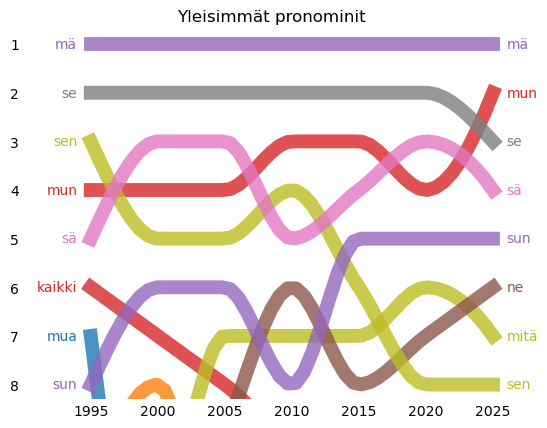

In [27]:
for word in enumerate(df_pronominit.columns):
    x = df_pronominit.index
    xs = np.linspace(1995, 2025)
    y = df_pronominit[word[1]].values
    i = word[0]

    color = colors[i%10]

    plt.plot(xs, interpolate.pchip(x, y)(xs), lw=10, alpha=0.8, markersize=16, color=color)
    # plt.plot(x, y, 'o', alpha=1, markersize=12, lw=0, color=color)

    if y[0]<=8:
        plt.text(x[0]-1, y[0], s=word[1], horizontalalignment="right", verticalalignment="center", color=color)
    if y[-1]<=8:
        plt.text(x[-1]+1, y[-1], s=word[1], horizontalalignment="left", verticalalignment="center", color=color)

    xcorr = 0.35
    ycorr = 0.11

    ax = plt.gca()

    # for i,j in zip(x,y):
    #     ax.annotate(str(int(j)),  xy=(i-xcorr, j+ycorr), color='white',
    #                 fontsize=12, weight='heavy')




plt.ylim(8.3,0.7)
plt.xlim(1990,2027)
# ax.set_yticks([])
ax.set_xticks([1995, 2000, 2005, 2010, 2015, 2020, 2025])
ax.tick_params(length=0)
sns.despine(left=True, bottom=True)

plt.title("Yleisimmät pronominit")

In [28]:
def luo_chart(sanaluokka, stopwords=[]):
    df = common_words_df[common_words_df["sanaluokka"]==sanaluokka]
    df = df[~df["word"].isin(stopwords)]
    df.dropna(inplace=True)
    df = df[df["year"]>=1990]

    df = df.groupby([pd.cut(df.year, [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]), "word"])["f"].sum().reset_index()
    df["year"] = df["year"].astype(str).apply(lambda x: x[6:11]).astype(int)
    df["f"] = df["f"].astype(int)
    df.sort_values(by=["year", "f"], ascending=False, inplace=True)
    df = df.groupby("year").head(20).reset_index(drop=True)
    df["rank"] = df.groupby(["year"])["f"].rank(method="first", ascending=False).astype(int)

    df.pivot(index="year", columns="rank", values="word")
    df_pronominit = df.pivot(index="year", columns="word", values="rank")
    df_pronominit.fillna(10000, inplace=True)

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    for word in enumerate(df_pronominit.columns):
        x = df_pronominit.index
        xs = np.linspace(1995, 2025)
        y = df_pronominit[word[1]].values
        i = word[0]

        color = colors[i%10]

        plt.plot(xs, interpolate.pchip(x, y)(xs), lw=10, alpha=0.8, markersize=16, color=color)

        if y[0]<=8:
            plt.text(x[0]-1, y[0], s=word[1], horizontalalignment="right", verticalalignment="center", color=color)
        if y[-1]<=8:
            plt.text(x[-1]+1, y[-1], s=word[1], horizontalalignment="left", verticalalignment="center", color=color)


    ax = plt.gca()

    plt.ylim(8.3,0.7)
    plt.xlim(1990,2027)
    ax.set_xticks([1995, 2000, 2005, 2010, 2015, 2020, 2025])
    ax.tick_params(length=0)
    sns.despine(left=True, bottom=True)

    plt.title(f"Yleisimmät sanat - {sanaluokka}")
    plt.show()
    plt.close()

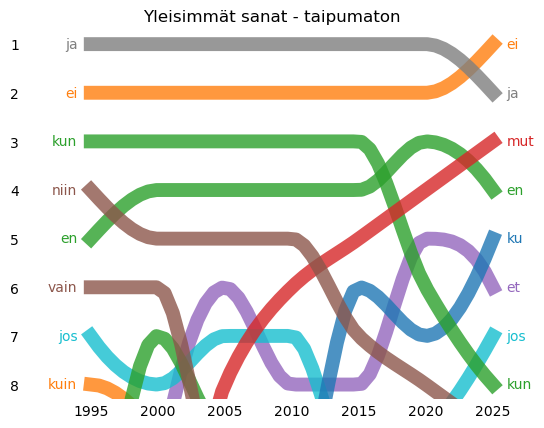

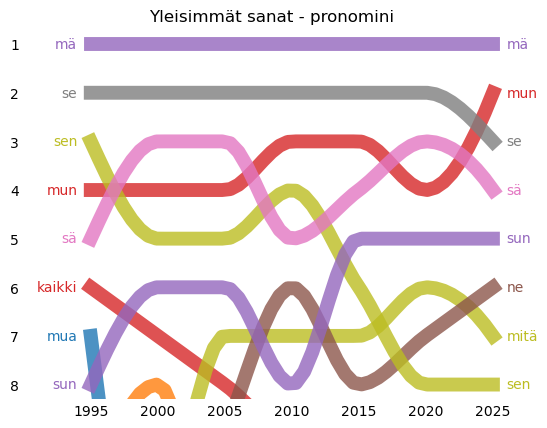

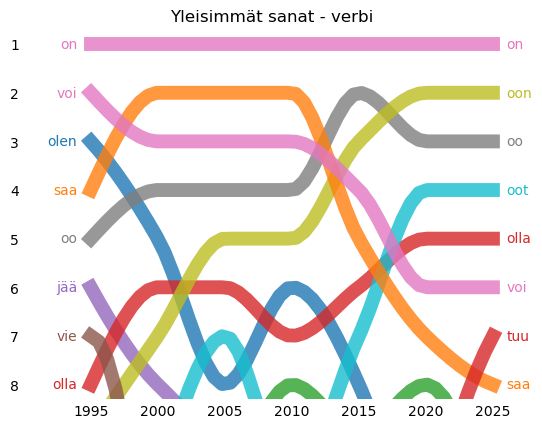

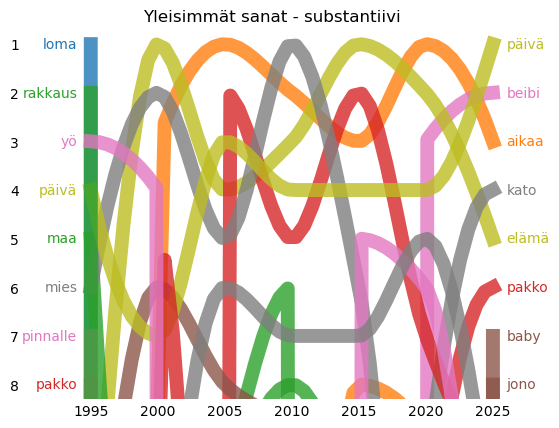

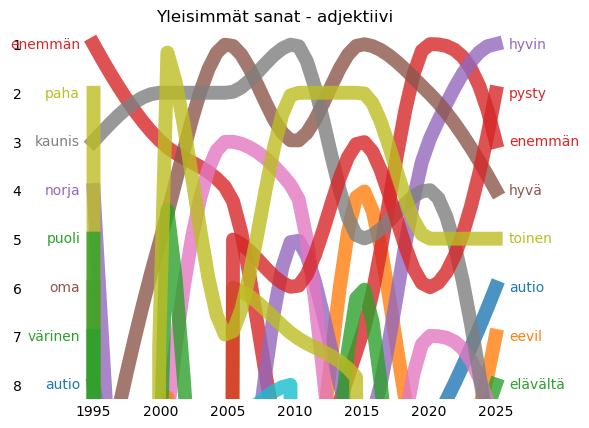

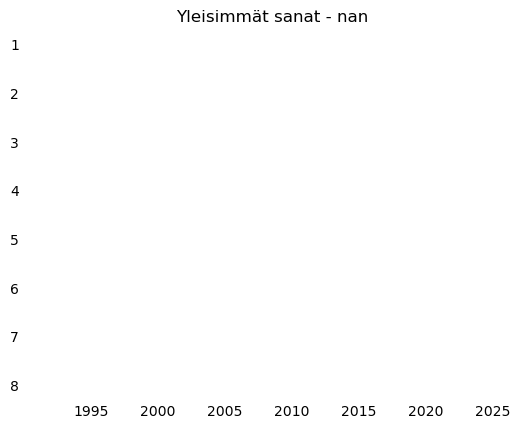

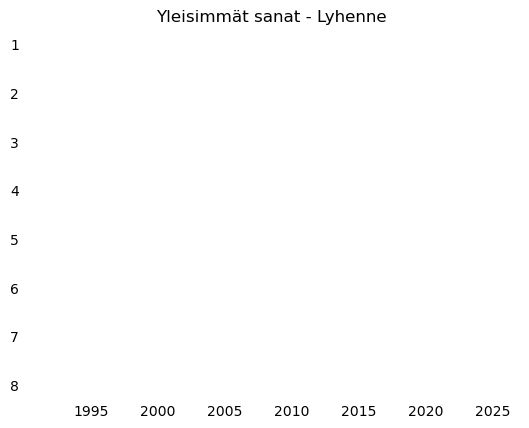

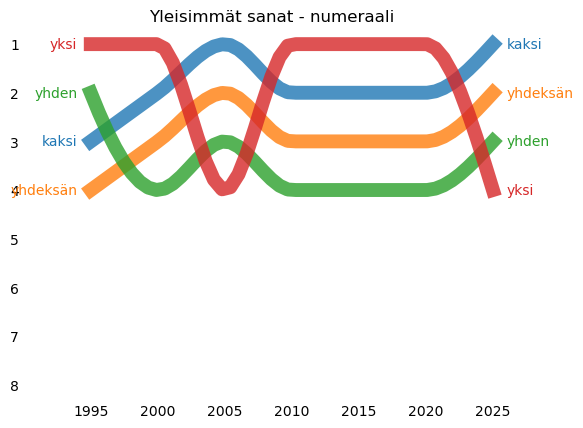

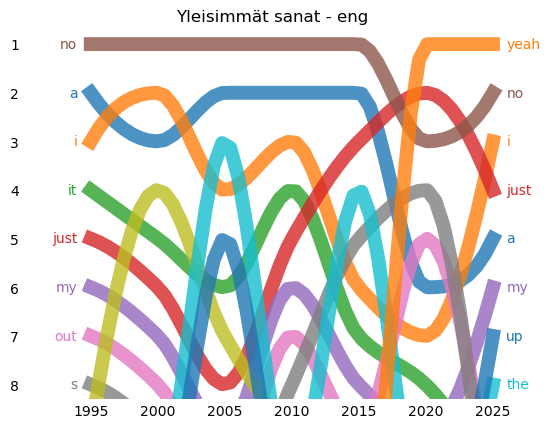

In [29]:
sanaluokat_list = common_words_df["sanaluokka"].unique().tolist()
for sanaluokka in sanaluokat_list:
    luo_chart(sanaluokka)

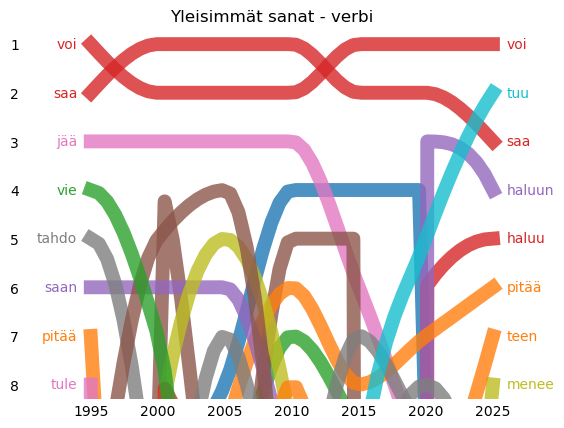

In [30]:
luo_chart("verbi", ["on", "oon", "oo", "oot", "olla", "oli", "ollu", "ois", "olen", "ole"])

### 0.5 filter

In [31]:
df = lyrics_df.copy().reset_index(drop=True)
df["lyrics"] = df["lyrics"].apply(split_into_words)
processed_docs = df["lyrics"]

In [32]:
df

artist               song_title  year  \
0     2-Times-Terror  Equals-One-Sudden-Death  2010   
1     2-Times-Terror  Equals-One-Sudden-Death  2010   
2     2-Times-Terror  Equals-One-Sudden-Death  2010   
3     2-Times-Terror  Equals-One-Sudden-Death  2010   
4           51koodia           Mustat-sydamet  2008   
...              ...                      ...   ...   
8751             Yup                Yovieraat  1996   
8752             Yup                Yovieraat  1996   
8753             Yup                Yovieraat  1996   
8754             Yup                Yovieraat  1996   
8755             Yup                Yovieraat  1996   

                                                 lyrics lang  
0     [haureudessa, rypenyt, vartalo, karttaa, laulu...   fi  
1     [sorkat, kohti, kattoa, sorkat, kohti, kattoa,...   fi  
2     [pyörivät, päät, diktaattorien, vallananastaja...   fi  
3     [ihoni, on, läpinäkyvä, ja, kylmä, näen, sisäe...   fi  
4     [hei, oletko, yksi, heistä, joka, eksyi, maail...   fi  
...                                                 ...  ...  
8751  [kätilö, kehaisi, ensisynnyttäjää, potra, poik...   fi  
8752  [ilta, on, tummuva, merkit, on, taivaalla, täy...   fi  
8753  [, kartanonne, on, linnanne, näin, vieraamme, ...   fi  
8754  [, rock, n, rollin, kuningas, on, kuollut, san...   fi  
8755  [keijo, kettu, viiden, pennin, petkuttaja, sel...   fi  

[8756 rows x 5 columns]

In [33]:
dictionary = gensim.corpora.Dictionary(processed_docs )

In [34]:
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

In [35]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [36]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 3 ("kaikki") appears 1 time.
Word 106 ("kansa") appears 3 time.
Word 149 ("kuu") appears 1 time.
Word 157 ("olen") appears 1 time.
Word 239 ("auringon") appears 2 time.
Word 247 ("jo") appears 1 time.
Word 285 ("siellä") appears 1 time.
Word 314 ("jäljet") appears 1 time.
Word 339 ("ollut") appears 1 time.
Word 358 ("täällä") appears 1 time.
Word 561 ("sinne") appears 3 time.
Word 822 ("maan") appears 1 time.
Word 840 ("päälle") appears 1 time.
Word 883 ("yön") appears 2 time.
Word 1014 ("näin") appears 2 time.
Word 1088 ("alle") appears 3 time.
Word 1619 ("nähnyt") appears 1 time.
Word 1697 ("päällä") appears 2 time.
Word 1984 ("maata") appears 1 time.
Word 2339 ("lapset") appears 2 time.
Word 2474 ("luonnon") appears 2 time.
Word 2601 ("asua") appears 1 time.
Word 3171 ("luokse") appears 2 time.
Word 3224 ("lämmin") appears 1 time.
Word 3310 ("siivet") appears 1 time.
Word 4345 ("kuun") appears 3 time.
Word 4583 ("katseen") appears 2 time.
Word 4596 ("tyhjän") appears 1 time.
Wo

In [37]:
df["common words"] = ""

In [38]:
for i in df.index:
    list = []
    bow_doc_i = bow_corpus[i]

    for n in range(len(bow_doc_i)):
        tuple = (dictionary[bow_doc_i[n][0]], bow_doc_i[n][1])
        list.append(tuple)

    list = list[:200]
    df.at[i,"common words"] = list
df

artist               song_title  year  \
0     2-Times-Terror  Equals-One-Sudden-Death  2010   
1     2-Times-Terror  Equals-One-Sudden-Death  2010   
2     2-Times-Terror  Equals-One-Sudden-Death  2010   
3     2-Times-Terror  Equals-One-Sudden-Death  2010   
4           51koodia           Mustat-sydamet  2008   
...              ...                      ...   ...   
8751             Yup                Yovieraat  1996   
8752             Yup                Yovieraat  1996   
8753             Yup                Yovieraat  1996   
8754             Yup                Yovieraat  1996   
8755             Yup                Yovieraat  1996   

                                                 lyrics lang  \
0     [haureudessa, rypenyt, vartalo, karttaa, laulu...   fi   
1     [sorkat, kohti, kattoa, sorkat, kohti, kattoa,...   fi   
2     [pyörivät, päät, diktaattorien, vallananastaja...   fi   
3     [ihoni, on, läpinäkyvä, ja, kylmä, näen, sisäe...   fi   
4     [hei, oletko, yksi, heistä, joka, eksyi, maail...   fi   
...                                                 ...  ...   
8751  [kätilö, kehaisi, ensisynnyttäjää, potra, poik...   fi   
8752  [ilta, on, tummuva, merkit, on, taivaalla, täy...   fi   
8753  [, kartanonne, on, linnanne, näin, vieraamme, ...   fi   
8754  [, rock, n, rollin, kuningas, on, kuollut, san...   fi   
8755  [keijo, kettu, viiden, pennin, petkuttaja, sel...   fi   

                                           common words  
0     [(ihmisen, 5), (irti, 1), (jakamaan, 1), (kaik...  
1     [(irti, 1), (kiinni, 1), (aikaa, 1), (ajaa, 1)...  
2     [(aseet, 1), (haluan, 1), (hopeaa, 2), (ihmine...  
3     [(kiinni, 2), (koskaan, 4), (vaikka, 2), (en, ...  
4     [(katsomaan, 1), (saa, 1), (jotka, 1), (eikä, ...  
...                                                 ...  
8751  [(kiinni, 2), (ajaa, 1), (joskus, 1), (meidät,...  
8752  [(saa, 6), (taivaalta, 1), (ne, 1), (kuin, 3),...  
8753  [(saa, 2), (joskus, 1), (kohti, 1), (ottaa, 1)...  
8754  [(kaikki, 1), (saa, 3), (jotka, 3), (ne, 2), (...  
8755  [(saa, 1), (enää, 1), (vailla, 1), (mutta, 1),...  

[8756 rows x 6 columns]

In [39]:
lyrics_df_05_bow = df.copy()

In [41]:
common_words_df_05 = df.explode("common words")[["year", "common words"]]
common_words_df_05[["word", "f"]] = common_words_df_05["common words"].apply(pd.Series)
common_words_df_05 = common_words_df_05[["year", "word", "f"]]
common_words_df_05

KeyboardInterrupt: 

In [ ]:
common_words_df_05 = common_words_df_05.sort_values(by=["year","f"],ascending=False).groupby("year").head(200).reset_index(drop=True)

year      word      f
0     2023      jono  132.0
1     2023       tuu   87.0
2     2023        mi   56.0
3     2023     ilman   53.0
4     2023      raha   48.0
...    ...       ...    ...
8595  1972    pyörät    1.0
8596  1972  kaupunki    1.0
8597  1972   sankari    1.0
8598  1972   kiipeän    1.0
8599  1972   katolle    1.0

[8600 rows x 3 columns]

In [ ]:
common_words_df_05["sanaluokka"] = common_words_df_05["word"].map(sanaluokat_dict)
common_words_df_05

year         word      f    sanaluokka
5994  1972      koskaan    1.0    taipumaton
5994  1972           en    1.0    taipumaton
5994  1972  milloinkaan    1.0    taipumaton
5994  1972          sai    1.0  substantiivi
5994  1972       unohda    1.0           NaN
...    ...          ...    ...           ...
5844  2023           sä   48.0     pronomini
2122  2023        ilman   53.0    taipumaton
660   2023           mi   56.0           NaN
667   2023          tuu   87.0         verbi
663   2023         jono  132.0  substantiivi

[633861 rows x 4 columns]

In [ ]:
common_words_df_05 = common_words_df_05.sort_values(by=["year","f"])
df2 = common_words_df_05.groupby([pd.cut(common_words_df_05["year"], [1990, 2000, 2010, 2020, 2025]), "word"])["f"].sum().reset_index()
df2["year"] = df2["year"].astype(str).apply(lambda x: x[1:5]).astype(int)
df2

year  word      f
0      1990        235.0
1      1990     0    0.0
2      1990     1    1.0
3      1990    10    1.0
4      1990   100    1.0
...     ...   ...    ...
43595  2020  öitä    9.0
43596  2020    öö    5.0
43597  2020    еi   22.0
43598  2020    еn   14.0
43599  2020    еt   16.0

[43600 rows x 3 columns]

In [ ]:
df2.sort_values(by=["year", "f"], ascending=False).groupby("year").head(20).head(50)

year    word       f
37858  2020     mun  3008.0
37906  2020     mut  2251.0
33455  2020      en  2241.0
36088  2020      ku  2226.0
41214  2020      sä  2168.0
33545  2020      et  2072.0
38662  2020     oon  1805.0
38654  2020      oo  1682.0
40964  2020     sun  1440.0
34842  2020     jos  1410.0
38120  2020      ne  1398.0
37737  2020    mitä  1139.0
38172  2020    niin  1132.0
38342  2020     nyt  1024.0
43386  2020    yeah   971.0
40554  2020     sen   952.0
42342  2020     tää   951.0
42508  2020    vaan   907.0
35173  2020  kaikki   857.0
37842  2020     mul   784.0
22555  2010      en  6934.0
26958  2010     mun  6621.0
30314  2010      sä  6566.0
27006  2010     mut  6282.0
22645  2010      et  5923.0
30064  2010     sun  5232.0
25188  2010      ku  5184.0
27754  2010      oo  5147.0
27272  2010    niin  5027.0
23942  2010     jos  4589.0
27762  2010     oon  4562.0
31608  2010    vaan  4295.0
26837  2010    mitä  3899.0
29654  2010     sen  3589.0
27220  2010      ne  3448.0
27442  2010     nyt  3396.0
31442  2010     tää  2881.0
24273  2010  kaikki  2833.0
26530  2010      me  2665.0
26874  2010     mua  2365.0
11655  2000      en  3999.0
16372  2000    niin  3539.0
16058  2000     mun  3120.0
18754  2000     sen  2889.0
19414  2000      sä  2765.0
11745  2000      et  2723.0
13042  2000     jos  2683.0
16106  2000     mut  2659.0
20708  2000    vaan  2379.0
16542  2000     nyt  2306.0

### Wordclouds

In [ ]:
# browser_market_share = {
#     'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
#     'market_share': [8.61, 69.55, 8.36, 4.12, 2.76, 2.43],
#     'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
# }

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                    self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                    self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

def create_bubblechart(words, values, colors, title=""):
    bubble_chart = BubbleChart(area=values,
                            bubble_spacing=0.1)

    bubble_chart.collapse()

    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
    bubble_chart.plot(
        ax, words, colors)
    ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    ax.set_title(title)

    plt.show()

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [ ]:
df = common_words_df[common_words_df["sanaluokka"]=="pronomini"]
df = df[df["year"]>=1990]

df = df.groupby([pd.cut(df.year, [1990, 2000, 2010, 2020, 2025]), "word"])["f"].sum().reset_index()
df["year"] = df["year"].astype(str).apply(lambda x: x[1:5]).astype(int)
df["f"] = df["f"].astype(int)
df.sort_values(by=["year", "f"], ascending=False, inplace=True)
df = df.groupby("year").head(10).reset_index(drop=True)
# df["rank"] = df.groupby(["year"])["f"].rank(method="first", ascending=False).astype(int)

# df.pivot(index="year", columns="f", values="word")
df_pronominit_10 = df.copy()
df_pronominit_10.fillna(10000, inplace=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

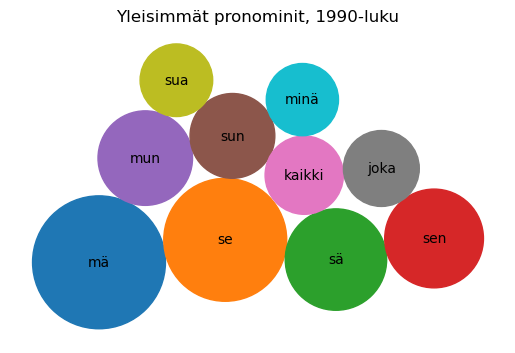

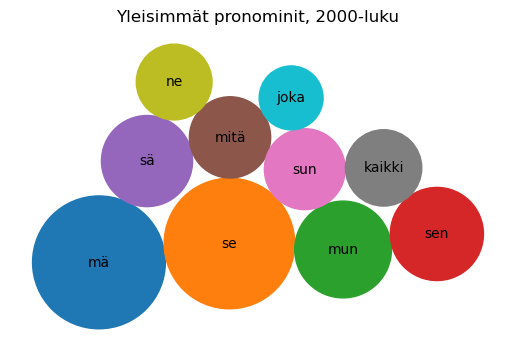

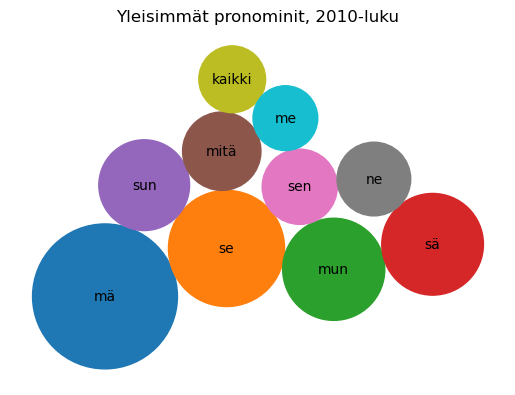

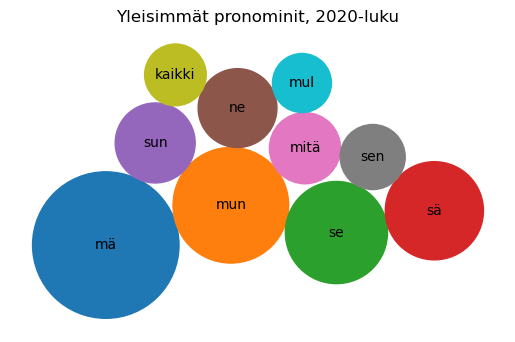

In [ ]:
for decade in [1990, 2000, 2010, 2020]:
    df = df_pronominit_10[df_pronominit_10["year"]==decade].reset_index(drop=True)
    df["f"] = df["f"].astype(float)
    for col, row in df.iterrows():
        i = row.name
        df.loc[i, "color"] = colors[i%10]
    create_bubblechart(df["word"], df["f"], df["color"], f"Yleisimmät pronominit, {decade}-luku")

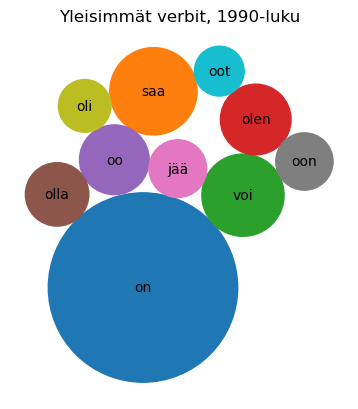

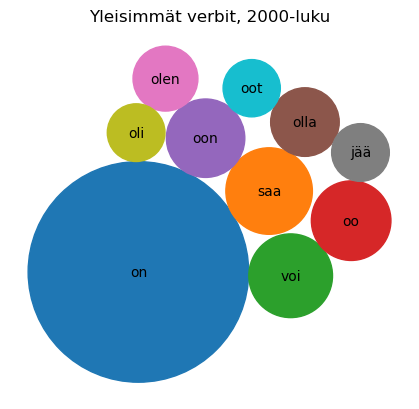

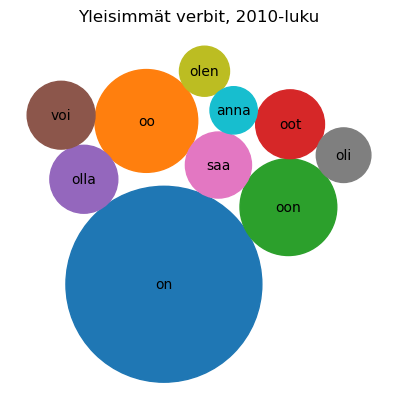

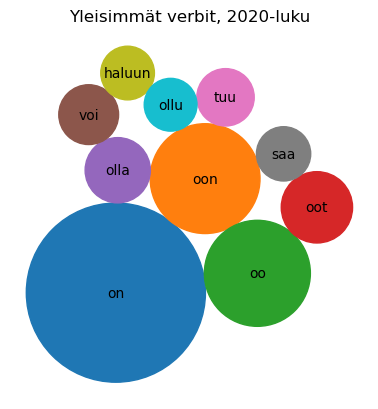

In [ ]:
df = common_words_df[common_words_df["sanaluokka"]=="verbi"]
df = df[df["year"]>=1990]

df = df.groupby([pd.cut(df.year, [1990, 2000, 2010, 2020, 2025]), "word"])["f"].sum().reset_index()
df["year"] = df["year"].astype(str).apply(lambda x: x[1:5]).astype(int)
df["f"] = df["f"].astype(int)
df.sort_values(by=["year", "f"], ascending=False, inplace=True)
df = df.groupby("year").head(10).reset_index(drop=True)
# df["rank"] = df.groupby(["year"])["f"].rank(method="first", ascending=False).astype(int)

# df.pivot(index="year", columns="f", values="word")
df_pronominit_10 = df.copy()
df_pronominit_10.fillna(10000, inplace=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for decade in [1990, 2000, 2010, 2020]:
    df = df_pronominit_10[df_pronominit_10["year"]==decade].reset_index(drop=True)
    df["f"] = df["f"].astype(float)
    for col, row in df.iterrows():
        i = row.name
        df.loc[i, "color"] = colors[i%10]
    create_bubblechart(df["word"], df["f"], df["color"], f"Yleisimmät verbit, {decade}-luku")

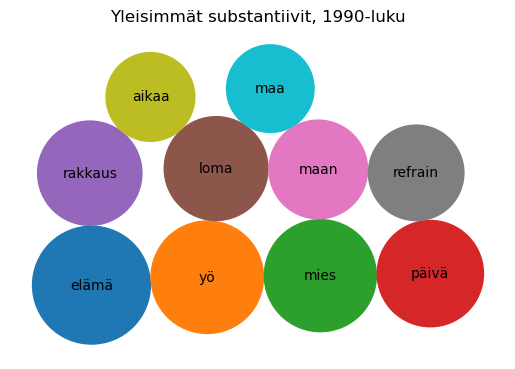

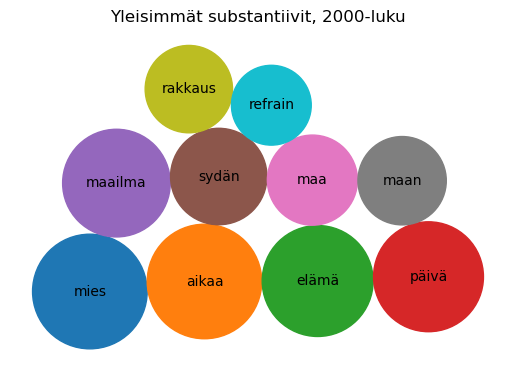

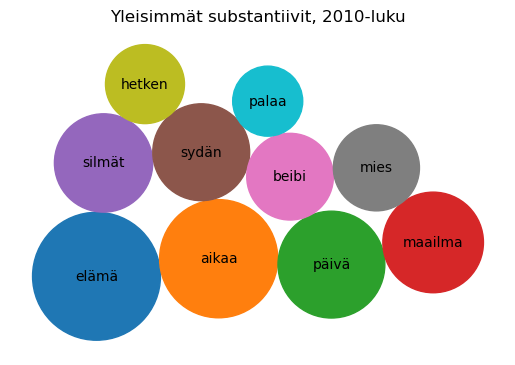

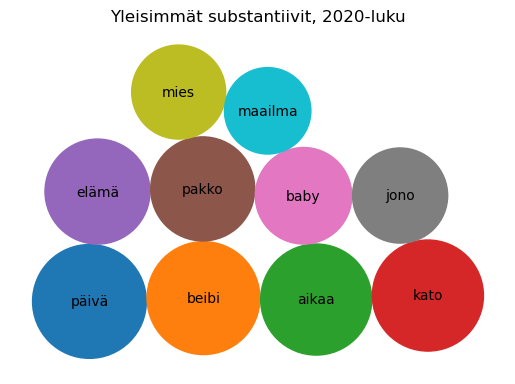

In [ ]:
df = common_words_df[common_words_df["sanaluokka"]=="substantiivi"]
df = df[df["year"]>=1990]

df = df.groupby([pd.cut(df.year, [1990, 2000, 2010, 2020, 2025]), "word"])["f"].sum().reset_index()
df["year"] = df["year"].astype(str).apply(lambda x: x[1:5]).astype(int)
df["f"] = df["f"].astype(int)
df.sort_values(by=["year", "f"], ascending=False, inplace=True)
df = df.groupby("year").head(10).reset_index(drop=True)
# df["rank"] = df.groupby(["year"])["f"].rank(method="first", ascending=False).astype(int)

# df.pivot(index="year", columns="f", values="word")
df_pronominit_10 = df.copy()
df_pronominit_10.fillna(10000, inplace=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for decade in [1990, 2000, 2010, 2020]:
    df = df_pronominit_10[df_pronominit_10["year"]==decade].reset_index(drop=True)
    df["f"] = df["f"].astype(float)
    for col, row in df.iterrows():
        i = row.name
        df.loc[i, "color"] = colors[i%10]
    create_bubblechart(df["word"], df["f"], df["color"], f"Yleisimmät substantiivit, {decade}-luku")

#### 0.5

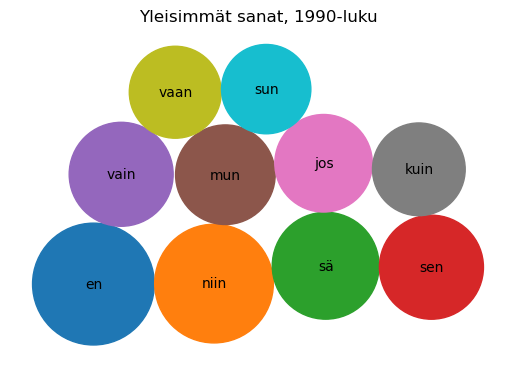

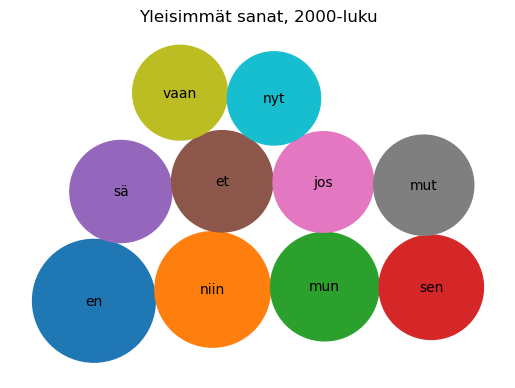

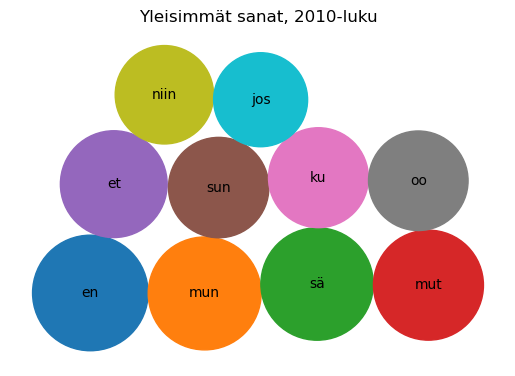

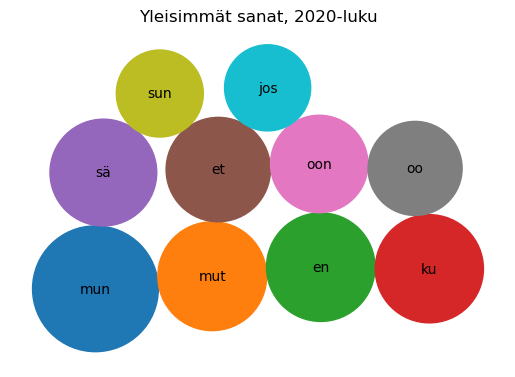

In [ ]:
df = common_words_df_05.copy()
df = df[df["year"]>=1990]

df = df.groupby([pd.cut(df.year, [1990, 2000, 2010, 2020, 2025]), "word"])["f"].sum().reset_index()
df["year"] = df["year"].astype(str).apply(lambda x: x[1:5]).astype(int)
df["f"] = df["f"].astype(int)
df.sort_values(by=["year", "f"], ascending=False, inplace=True)
df = df.groupby("year").head(10).reset_index(drop=True)
# df["rank"] = df.groupby(["year"])["f"].rank(method="first", ascending=False).astype(int)

# df.pivot(index="year", columns="f", values="word")
df_pronominit_10 = df.copy()
df_pronominit_10.fillna(10000, inplace=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for decade in [1990, 2000, 2010, 2020]:
    df = df_pronominit_10[df_pronominit_10["year"]==decade].reset_index(drop=True)
    df["f"] = df["f"].astype(float)
    for col, row in df.iterrows():
        i = row.name
        df.loc[i, "color"] = colors[i%10]
    create_bubblechart(df["word"], df["f"], df["color"], f"Yleisimmät sanat, {decade}-luku")

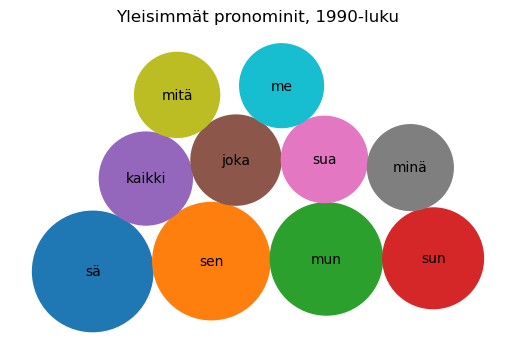

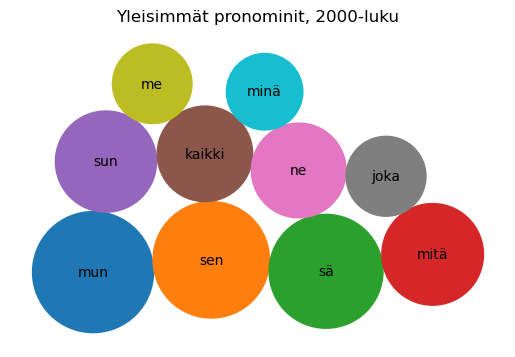

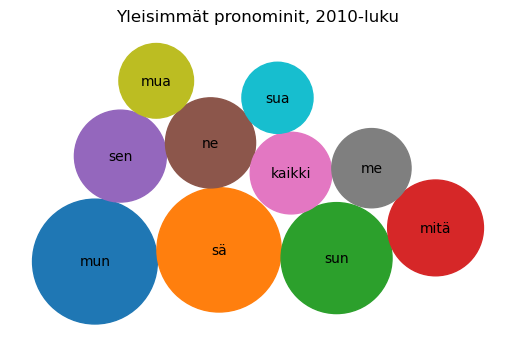

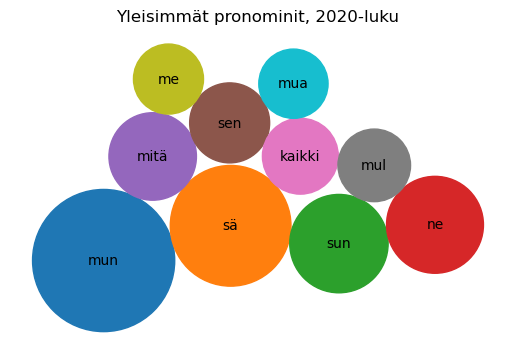

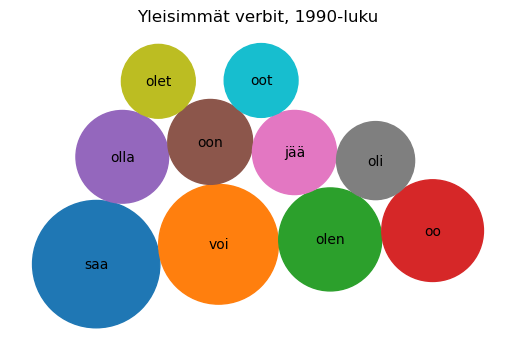

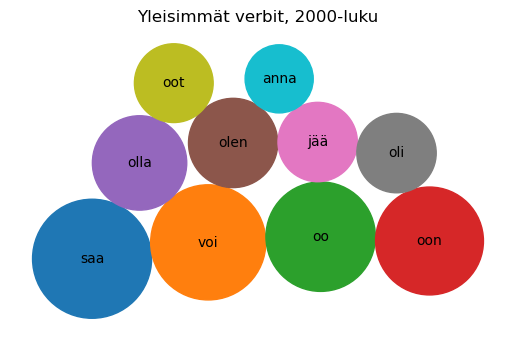

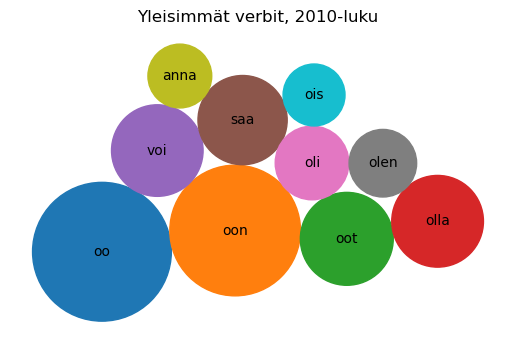

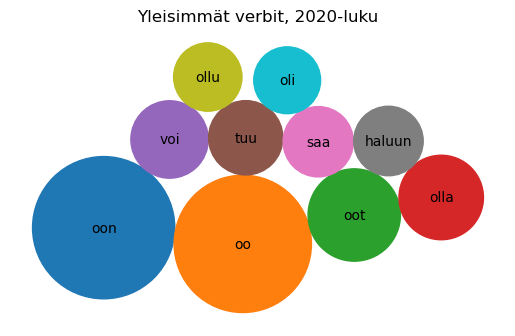

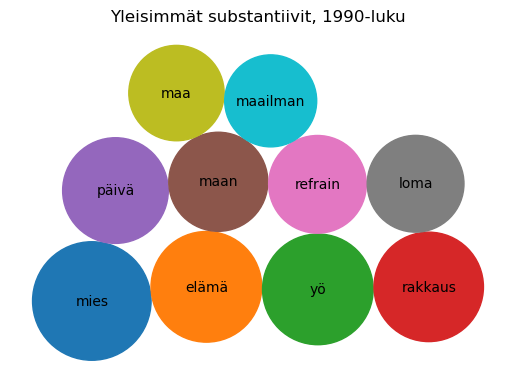

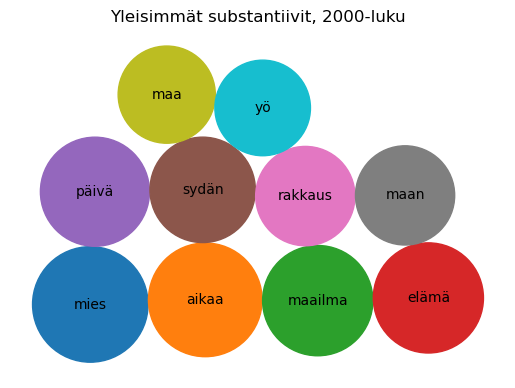

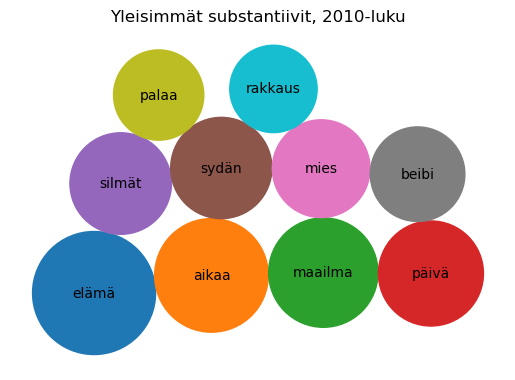

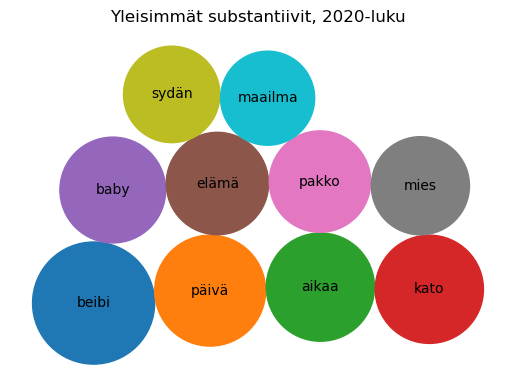

In [ ]:
df = common_words_df_05[common_words_df_05["sanaluokka"]=="pronomini"]
df = df[df["year"]>=1990]

df = df.groupby([pd.cut(df.year, [1990, 2000, 2010, 2020, 2025]), "word"])["f"].sum().reset_index()
df["year"] = df["year"].astype(str).apply(lambda x: x[1:5]).astype(int)
df["f"] = df["f"].astype(int)
df.sort_values(by=["year", "f"], ascending=False, inplace=True)
df = df.groupby("year").head(10).reset_index(drop=True)
# df["rank"] = df.groupby(["year"])["f"].rank(method="first", ascending=False).astype(int)

# df.pivot(index="year", columns="f", values="word")
df_pronominit_10 = df.copy()
df_pronominit_10.fillna(10000, inplace=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for decade in [1990, 2000, 2010, 2020]:
    df = df_pronominit_10[df_pronominit_10["year"]==decade].reset_index(drop=True)
    df["f"] = df["f"].astype(float)
    for col, row in df.iterrows():
        i = row.name
        df.loc[i, "color"] = colors[i%10]
    create_bubblechart(df["word"], df["f"], df["color"], f"Yleisimmät pronominit, {decade}-luku")
df = common_words_df_05[common_words_df_05["sanaluokka"]=="verbi"]
df = df[df["year"]>=1990]

df = df.groupby([pd.cut(df.year, [1990, 2000, 2010, 2020, 2025]), "word"])["f"].sum().reset_index()
df["year"] = df["year"].astype(str).apply(lambda x: x[1:5]).astype(int)
df["f"] = df["f"].astype(int)
df.sort_values(by=["year", "f"], ascending=False, inplace=True)
df = df.groupby("year").head(10).reset_index(drop=True)
# df["rank"] = df.groupby(["year"])["f"].rank(method="first", ascending=False).astype(int)

# df.pivot(index="year", columns="f", values="word")
df_pronominit_10 = df.copy()
df_pronominit_10.fillna(10000, inplace=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for decade in [1990, 2000, 2010, 2020]:
    df = df_pronominit_10[df_pronominit_10["year"]==decade].reset_index(drop=True)
    df["f"] = df["f"].astype(float)
    for col, row in df.iterrows():
        i = row.name
        df.loc[i, "color"] = colors[i%10]
    create_bubblechart(df["word"], df["f"], df["color"], f"Yleisimmät verbit, {decade}-luku")
df = common_words_df_05[common_words_df_05["sanaluokka"]=="substantiivi"]
df = df[df["year"]>=1990]

df = df.groupby([pd.cut(df.year, [1990, 2000, 2010, 2020, 2025]), "word"])["f"].sum().reset_index()
df["year"] = df["year"].astype(str).apply(lambda x: x[1:5]).astype(int)
df["f"] = df["f"].astype(int)
df.sort_values(by=["year", "f"], ascending=False, inplace=True)
df = df.groupby("year").head(10).reset_index(drop=True)
# df["rank"] = df.groupby(["year"])["f"].rank(method="first", ascending=False).astype(int)

# df.pivot(index="year", columns="f", values="word")
df_pronominit_10 = df.copy()
df_pronominit_10.fillna(10000, inplace=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for decade in [1990, 2000, 2010, 2020]:
    df = df_pronominit_10[df_pronominit_10["year"]==decade].reset_index(drop=True)
    df["f"] = df["f"].astype(float)
    for col, row in df.iterrows():
        i = row.name
        df.loc[i, "color"] = colors[i%10]
    create_bubblechart(df["word"], df["f"], df["color"], f"Yleisimmät substantiivit, {decade}-luku")

## Tf-idf

In [ ]:
lyrics_df_5yrs = lyrics_df.groupby([pd.cut(lyrics_df.year, [1990,1995,2000,2005,2010,2015,2020,2025])])["lyrics"].apply(lambda x: ' '.join(x)).reset_index()
lyrics_df_5yrs["year"] = lyrics_df_5yrs["year"].astype(str).apply(lambda x: x[1:5]).astype(int)
lyrics_df_5yrs

year                                             lyrics
0  1990  lämmin ilta maalattu suu mansikalta mm maistuu...
1  1995  ja ehdotan että pidämme häntä kotona vielä vuo...
2  2000  en tiedä mitään en miks ilmeesi on aivan erila...
3  2005  haureudessa rypenyt vartalo karttaa laulua kun...
4  2010  ne on mun kintereil, ne mua hiillostaa ykkös t...
5  2015  aamul kun meet kahvii keittelee mä jään kuunte...
6  2020  on olohuone hetken estradi ja sen halki hyppää...

In [ ]:
lyrics_df["5yrs"] = pd.cut(lyrics_df.year, [1990,1995,2000,2005,2010,2015,2020,2025])
lyrics_df["5yrs"] = lyrics_df["5yrs"].astype(str)
lyrics_df["5yrs"] = lyrics_df["5yrs"].apply(lambda x: x[1:5])
lyrics_df["5yrs"] = lyrics_df["5yrs"].replace("an", 0)
lyrics_df["5yrs"] = lyrics_df["5yrs"].astype(int)
# lyrics_df.sort_values(by="5yrs")

In [ ]:
lyrics_1990_list = list(lyrics_df[lyrics_df["5yrs"]==1990]["lyrics"])

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
tfidf_vector = tfidf_vectorizer.fit_transform(lyrics_1990_list)

In [ ]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=np.linspace(0,264,265), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_1990 = tfidf_df.mean().reset_index(name="score").rename(columns={"index":"word"})
tfidf_1990.sort_values(by="score", ascending=False).head(50)

word     score
1803       ja  0.063022
5729       on  0.043920
522        ei  0.038256
3411      kun  0.030938
5193       mä  0.030662
7686       se  0.026175
7775      sen  0.024808
5349     niin  0.023510
605        en  0.022130
8413       sä  0.019360
9688     vain  0.018304
5055      mun  0.018207
1929      jos  0.017386
3277     kuin  0.016508
5501      nyt  0.015449
4992      mua  0.015147
8477     taas  0.015032
8172      sun  0.013481
2228   kaikki  0.013385
10208     voi  0.013190
4949     mitä  0.012354
4690       me  0.012297
1893     joka  0.012161
9621     vaan  0.012016
716      että  0.012000
5640     olen  0.011822
7441      saa  0.011367
5761       oo  0.011282
983       hei  0.011271
8110      sua  0.011130
9670   vaikka  0.010976
10024   vielä  0.010741
7992     sitä  0.010571
5764      oon  0.010568
80       aina  0.010561
4916     minä  0.010501
5307       ne  0.010211
1864       jo  0.010157
6530     pois  0.010016
5115      mut  0.009747
8501      tai  0.009648
2102      jää  0.009588
687        et  0.009252
645      enää  0.009136
1493      hän  0.009015
2212      kai  0.008975
10020     vie  0.008905
5655      oli  0.008871
5678     olla  0.008864
5118    mutta  0.008853

## N-grams

In [ ]:
def get_most_frequent_bigrams_string(string, n_words=200):
    
    number_of_desired_words = n_words
    meaningful_words_tally = Counter()
    
    nltk_tokens = split_into_words(string)  	

    all_the_words = list(nltk.bigrams(nltk_tokens))
    meaningful_words = [word for word in all_the_words]
    meaningful_words_tally.update(meaningful_words)
    
    most_frequent_meaningful_words = meaningful_words_tally.most_common(number_of_desired_words)

    return most_frequent_meaningful_words

In [ ]:
def get_most_frequent_trigrams_string(string, n_words=200):
    
    number_of_desired_words = n_words
    meaningful_words_tally = Counter()
    
    nltk_tokens = split_into_words(string)  	

    all_the_words = list(nltk.trigrams(nltk_tokens))
    meaningful_words = [word for word in all_the_words]
    meaningful_words_tally.update(meaningful_words)
    
    most_frequent_meaningful_words = meaningful_words_tally.most_common(number_of_desired_words)

    return most_frequent_meaningful_words

In [ ]:
def get_most_frequent_ngrams_string(string, n_words=200, n=4):
    
    number_of_desired_words = n_words
    meaningful_words_tally = Counter()

    all_the_words = list(ngrams(string.split(), n))
    meaningful_words = [word for word in all_the_words]
    meaningful_words_tally.update(meaningful_words)
    
    most_frequent_meaningful_words = meaningful_words_tally.most_common(number_of_desired_words)

    return most_frequent_meaningful_words

In [ ]:
lyrics_df_decades = lyrics_df.groupby([pd.cut(lyrics_df.year, [1990, 2000, 2010, 2020, 2025])])["lyrics"].apply(lambda x: ' '.join(x)).reset_index()
lyrics_df_decades["year"] = lyrics_df_decades["year"].astype(str).apply(lambda x: x[1:5]).astype(int)
lyrics_df_decades

year                                             lyrics
0  1990  ja ehdotan että pidämme häntä kotona vielä vuo...
1  2000  haureudessa rypenyt vartalo karttaa laulua kun...
2  2010  aamul kun meet kahvii keittelee mä jään kuunte...
3  2020  on olohuone hetken estradi ja sen halki hyppää...

In [ ]:
get_most_frequent_bigrams_string(lyrics_df_decades["lyrics"][3])

[(('mä', 'oon'), 833),
 (('ei', 'oo'), 700),
 (('se', 'on'), 537),
 (('mul', 'on'), 490),
 (('mä', 'en'), 413),
 (('sä', 'oot'), 400),
 (('en', 'oo'), 308),
 (('tää', 'on'), 285),
 (('ja', 'mä'), 284),
 (('yeah', 'yeah'), 241),
 (('sä', 'et'), 226),
 (('ku', 'mä'), 219),
 (('en', 'mä'), 212),
 (('on', 'mun'), 210),
 (('kun', 'mä'), 172),
 (('mut', 'ei'), 156),
 (('jos', 'sä'), 148),
 (('niin', 'ku'), 147),
 (('la', 'la'), 141),
 (('na', 'na'), 140),
 (('se', 'ei'), 138),
 (('et', 'sä'), 137),
 (('mut', 'en'), 134),
 (('mut', 'mä'), 126),
 (('et', 'oo'), 125),
 (('ei', 'ei'), 120),
 (('kaikki', 'on'), 118),
 (('mä', 'haluun'), 117),
 (('jono', 'jono'), 112),
 (('mun', 'kaa'), 111),
 (('ne', 'on'), 111),
 (('ja', 'sä'), 107),
 (('tuu', 'tuu'), 107),
 (('ne', 'ei'), 106),
 (('meil', 'on'), 103),
 (('et', 'mä'), 102),
 (('mä', 'teen'), 102),
 (('mut', 'se'), 101),
 (('sä', 'voit'), 99),
 (('oot', 'mun'), 96),
 (('jos', 'mä'), 96),
 (('en', 'tiiä'), 89),
 (('ja', 'se'), 88),
 (('en', 'haluu

In [ ]:
get_most_frequent_trigrams_string(lyrics_df_decades["lyrics"][2])

[(('mä', 'en', 'oo'), 217),
 (('oo', 'oo', 'oo'), 207),
 (('ei', 'ei', 'ei'), 205),
 (('sä', 'et', 'oo'), 187),
 (('sä', 'oot', 'mun'), 146),
 (('tää', 'ei', 'oo'), 143),
 (('na', 'na', 'na'), 140),
 (('ja', 'se', 'on'), 124),
 (('mafia', 'mafia', 'mafia'), 122),
 (('mul', 'ei', 'oo'), 116),
 (('jee', 'jee', 'jee'), 110),
 (('se', 'ei', 'oo'), 108),
 (('mitä', 'mä', 'teen'), 108),
 (('ei', 'oo', 'ei'), 105),
 (('ja', 'mä', 'oon'), 101),
 (('tää', 'on', 'mun'), 99),
 (('oo', 'ei', 'oo'), 99),
 (('mä', 'oon', 'sun'), 94),
 (('mut', 'mä', 'en'), 90),
 (('lai', 'lai', 'lai'), 89),
 (('ei', 'oo', 'mitään'), 83),
 (('hei', 'hei', 'hei'), 81),
 (('yeah', 'yeah', 'yeah'), 80),
 (('woo', 'oo', 'oo'), 75),
 (('la', 'la', 'la'), 74),
 (('tää', 'on', 'se'), 73),
 (('mut', 'se', 'ei'), 72),
 (('mä', 'en', 'haluu'), 72),
 (('o', 'o', 'o'), 70),
 (('se', 'on', 'niin'), 69),
 (('mä', 'oon', 'niin'), 68),
 (('en', 'tiedä', 'mitä'), 67),
 (('jos', 'sä', 'haluut'), 63),
 (('se', 'on', 'hänes'), 63),
 (('

## Thematic analysis

In [115]:
#Import nltk Snowball stemmer
from nltk.stem.snowball import SnowballStemmer

#Create a Finnish instance
stemmer = SnowballStemmer("finnish")

#Print the stemmed version of some Finnish word
print(stemmer.stem("tunne"))

tun


In [43]:
pronominit_ja_taipumaton_list = sanaluokat[(sanaluokat["luokka"]=="taipumaton") | (sanaluokat["luokka"]=="pronomini") | (sanaluokat["luokka"]=="verbi")]["sana"].tolist()
# pronominit_ja_taipumaton_list = sanaluokat[(sanaluokat["luokka"]=="taipumaton") | (sanaluokat["luokka"]=="pronomini")]["sana"].tolist()
pronominit_ja_taipumaton_list.append(["on", "oon", "oo", "oot", "olla", "oli", "ollu", "ois", "olen", "ole"])

In [44]:
lyrics_df_tokens = lyrics_df.copy().reset_index(drop=True)
lyrics_df_tokens["lyrics"] = lyrics_df_tokens["lyrics"].apply(split_into_words)
lyrics_df_tokens["lyrics"] = lyrics_df_tokens["lyrics"].apply(lambda x: [word for word in x if word not in pronominit_ja_taipumaton_list])
lyrics_df_tokens["lyrics"] = lyrics_df_tokens["lyrics"].apply(lambda x: [stemmer.stem(word) for word in x])
lyrics_df_tokens["lyrics"] = lyrics_df_tokens["lyrics"].apply(lambda x: [word for word in x if word not in ["ole", "oo", "oli", "oon", "ol", "oot", "ois"]])
processed_docs = lyrics_df_tokens["lyrics"]

In [45]:
# lyrics_df_tokens.drop(columns=["level_0", "index"], inplace=True)
lyrics_df_tokens["index"] = lyrics_df_tokens.index

In [46]:
lyrics_df_tokens

artist               song_title  year  \
0     2-Times-Terror  Equals-One-Sudden-Death  2010   
1     2-Times-Terror  Equals-One-Sudden-Death  2010   
2     2-Times-Terror  Equals-One-Sudden-Death  2010   
3     2-Times-Terror  Equals-One-Sudden-Death  2010   
4           51koodia           Mustat-sydamet  2008   
...              ...                      ...   ...   
8751             Yup                Yovieraat  1996   
8752             Yup                Yovieraat  1996   
8753             Yup                Yovieraat  1996   
8754             Yup                Yovieraat  1996   
8755             Yup                Yovieraat  1996   

                                                 lyrics lang  index  
0     [haureud, rypeny, vartalo, kart, laulu, kunia,...   fi      0  
1     [sork, koht, kato, sork, koht, kato, viime, ma...   fi      1  
2     [pyöriv, päät, diktaattor, vallananastaj, tuij...   fi      2  
3     [iho, läpinäkyv, kylm, näen, sisäelim, vanh, m...   fi      3  
4     [yks, heis, eksyi, maailm, tietä, valmis, kunn...   fi      4  
...                                                 ...  ...    ...  
8751  [kätilö, kehai, ensisynnyttäj, potr, poikalap,...   fi   8751  
8752  [il, tummuv, merk, taiva, täysiku, tähyä, hyvä...   fi   8752  
8753  [, kartano, lin, viera, vitsailev, patricia, h...   fi   8753  
8754  [, rock, n, rol, kuningas, kuolu, sano, paksu,...   fi   8754  
8755  [keijo, ketu, viide, pen, petkuttaj, sel, kato...   fi   8755  

[8756 rows x 6 columns]

In [47]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [48]:
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

In [49]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [50]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 57 ("kylm") appears 1 time.
Word 69 ("parem") appears 2 time.
Word 96 ("hopea") appears 1 time.
Word 100 ("kans") appears 3 time.
Word 138 ("kuu") appears 1 time.
Word 203 ("auringo") appears 2 time.
Word 247 ("jälj") appears 1 time.
Word 285 ("hehkuv") appears 1 time.
Word 288 ("kats") appears 2 time.
Word 337 ("en") appears 1 time.
Word 353 ("varj") appears 2 time.
Word 395 ("harso") appears 1 time.
Word 436 ("ikuis") appears 2 time.
Word 607 ("tyhj") appears 1 time.
Word 669 ("maan") appears 1 time.
Word 724 ("yön") appears 2 time.
Word 885 ("kadotuks") appears 1 time.
Word 912 ("al") appears 3 time.
Word 1207 ("laps") appears 2 time.
Word 1276 ("kuun") appears 3 time.
Word 1620 ("mets") appears 1 time.
Word 1683 ("maata") appears 1 time.
Word 1705 ("usv") appears 1 time.
Word 1721 ("luoks") appears 2 time.
Word 2031 ("asu") appears 1 time.
Word 2106 ("luono") appears 2 time.
Word 2124 ("hämär") appears 1 time.
Word 2747 ("läm") appears 1 time.
Word 2807 ("siive") appears 1 tim

In [51]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.11075494695797371),
 (1, 0.23400258604118232),
 (2, 0.11560225758243449),
 (3, 0.10283680554797131),
 (4, 0.3333154699782122),
 (5, 0.07884453395196245),
 (6, 0.08624220733464273),
 (7, 0.1666577349891061),
 (8, 0.09623894788913395),
 (9, 0.06926722533402511),
 (10, 0.07367858575813546),
 (11, 0.09882506934184272),
 (12, 0.07922491773925149),
 (13, 0.10614335375216924),
 (14, 0.04796084070172221),
 (15, 0.18442305021185243),
 (16, 0.054899355624809014),
 (17, 0.36966038797567397),
 (18, 0.14936848181115328),
 (19, 0.0965888321890388),
 (20, 0.03797159538780046),
 (21, 0.1573148639214973),
 (22, 0.29305943404625934),
 (23, 0.06703754501616442),
 (24, 0.1021002362761088),
 (25, 0.14123297492010564),
 (26, 0.11560225758243449),
 (27, 0.11725176852604283),
 (28, 0.09767085735414432),
 (29, 0.0955704934458481),
 (30, 0.07922491773925149),
 (31, 0.10441123279192294),
 (32, 0.301145104254769),
 (33, 0.048344031977966315),
 (34, 0.040713487994183374),
 (35, 0.08743625079130532),
 (36, 0

In [66]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=9, workers=6, decay=0.72, minimum_probability=0.3)

In [61]:
lda_model2 = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=6, decay=0.98, minimum_probability=0.30)

In [141]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"silm" + 0.008*"taiva" + 0.007*"pala" + 0.007*"hyvä" + 0.005*"et" + 0.005*"tul" + 0.004*"tun" + 0.004*"hetk" + 0.004*"valo" + 0.003*"olis"
Topic: 1 
Words: 0.010*"yeah" + 0.005*"mies" + 0.004*"kato" + 0.004*"it" + 0.003*"tehä" + 0.003*"raha" + 0.003*"sano" + 0.003*"oma" + 0.003*"hyvä" + 0.003*"lähe"
Topic: 2 
Words: 0.007*"rakkaus" + 0.006*"hetk" + 0.006*"eläm" + 0.005*"päivä" + 0.005*"silm" + 0.005*"valo" + 0.004*"et" + 0.004*"kyynel" + 0.004*"kaik" + 0.003*"il"
Topic: 3 
Words: 0.007*"päivä" + 0.005*"eläm" + 0.005*"hyv" + 0.004*"tytö" + 0.004*"aamu" + 0.003*"teet" + 0.003*"herä" + 0.003*"ystäv" + 0.003*"pako" + 0.003*"silm"
Topic: 4 
Words: 0.017*"eläm" + 0.005*"oma" + 0.005*"lopu" + 0.005*"kato" + 0.004*"aika" + 0.003*"laulu" + 0.003*"hetk" + 0.003*"sana" + 0.003*"sano" + 0.003*"osa"
Topic: 5 
Words: 0.011*"beibi" + 0.006*"a" + 0.005*"the" + 0.005*"i" + 0.004*"tarv" + 0.004*"len" + 0.004*"päivä" + 0.003*"silm" + 0.003*"muka" + 0.003*"eläm"
Topic: 6 
Words: 0.0

In [104]:
param_eval_df = pd.DataFrame(columns=["params", "score"])
param_eval_df

Empty DataFrame
Columns: [params, score]
Index: []

In [110]:
import gensim
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim import corpora
import random

# Create a function to evaluate LDA models
def evaluate_lda_model(corpus, dictionary, num_topics, alpha, eta, passes, decay, minimum_probability):
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, alpha=alpha, eta=eta, passes=passes, workers=6, decay=decay, minimum_probability=minimum_probability)
    coherence_model = gensim.models.CoherenceModel(model=lda_model, corpus=corpus_tfidf, dictionary=dictionary, coherence='u_mass')
    return coherence_model.get_coherence()

# Load your data and preprocess it into a bag-of-words representation
# texts should be a list of tokenized documents
# dictionary should be a gensim Dictionary object
# corpus should be the corpus in the form of a list of (word_id, word_count) per document

# Set the range of hyperparameters to search
# param_space = {
#     'num_topics': [i for i in range(3, 20)],  # Adjust the range as needed
#     'alpha': [0.01, 0.1, 'symmetric', 'asymmetric'],
#     'eta': [0.01, 0.1, None],
#     'passes': [i for i in range(2, 20)],
#     "decay": [i/100 for i in range(50, 100)],
#     "minimum_probability": [i/1000 for i in range(5, 500)]
# }

param_space = {
    'num_topics': [i for i in range(3, 20)],  # Adjust the range as needed
    'alpha': ['symmetric'],
    'eta': [None],
    'passes': [i for i in range(2, 20)],
    "decay": [0.7],
    "minimum_probability": [0.3, 0.4]
}

# Number of random models to evaluate
num_random_models = 100

best_coherence = -10
best_params = None

# Random search for the best hyperparameters
for _ in range(num_random_models):
    params = {param: random.choice(param_space[param]) for param in param_space}
    num_topics = params['num_topics']
    alpha = params['alpha']
    eta = params['eta']
    passes = params['passes']
    decay = params["decay"]
    minimum_probability = params["minimum_probability"]

    coherence = evaluate_lda_model(bow_corpus, dictionary, num_topics, alpha, eta, passes, decay, minimum_probability)

    if coherence > best_coherence:
        best_coherence = coherence
        best_params = params

    # param_eval_df.loc[len(param_eval_df.index)] = [params, coherence]

print("Best LDA model (bow) hyperparameters:")
print(best_params)
print("Best coherence score:", best_coherence)


Best LDA model (bow) hyperparameters:
{'num_topics': 3, 'alpha': 'symmetric', 'eta': None, 'passes': 9, 'decay': 0.7, 'minimum_probability': 0.3}
Best coherence score: -2.041477958093353


In [107]:
# param_eval_df.to_json("param_eval_df.json")

In [142]:
def topic_num(corpus_index):
    try:
        return pd.DataFrame(lda_model[bow_corpus[corpus_index]]).sort_values(1, ascending=False)[0].tolist()[0]
    except:
        try:
            return lda_model2[bow_corpus[corpus_index]][0][1]
        except:
            None

In [143]:
lyrics_df_tokens["topic"] = lyrics_df_tokens["index"].apply(topic_num)
lyrics_df_tokens

artist               song_title  year  \
0     2-Times-Terror  Equals-One-Sudden-Death  2010   
1     2-Times-Terror  Equals-One-Sudden-Death  2010   
2     2-Times-Terror  Equals-One-Sudden-Death  2010   
3     2-Times-Terror  Equals-One-Sudden-Death  2010   
4           51koodia           Mustat-sydamet  2008   
...              ...                      ...   ...   
8751             Yup                Yovieraat  1996   
8752             Yup                Yovieraat  1996   
8753             Yup                Yovieraat  1996   
8754             Yup                Yovieraat  1996   
8755             Yup                Yovieraat  1996   

                                                 lyrics lang  index  topic  
0     [haureud, rypeny, vartalo, kart, laulu, kunia,...   fi      0    6.0  
1     [sork, koht, kato, sork, koht, kato, viime, ma...   fi      1    6.0  
2     [pyöriv, päät, diktaattor, vallananastaj, tuij...   fi      2    9.0  
3     [iho, läpinäkyv, kylm, näen, sisäelim, vanh, m...   fi      3    6.0  
4     [yks, heis, eksyi, maailm, tietä, valmis, kunn...   fi      4    2.0  
...                                                 ...  ...    ...    ...  
8751  [kätilö, kehai, ensisynnyttäj, potr, poikalap,...   fi   8751    3.0  
8752  [il, tummuv, merk, taiva, täysiku, tähyä, hyvä...   fi   8752    0.0  
8753  [, kartano, lin, viera, vitsailev, patricia, h...   fi   8753    2.0  
8754  [, rock, n, rol, kuningas, kuolu, sano, paksu,...   fi   8754    1.0  
8755  [keijo, ketu, viide, pen, petkuttaj, sel, kato...   fi   8755    7.0  

[8756 rows x 7 columns]

In [146]:
# lyrics_df_tokens.to_json("lyrics_df_topics_v1.json")

In [144]:
lyrics_df_tokens.groupby("topic")["song_title"].count().reset_index().sort_values(by="song_title", ascending=False).reset_index(drop=True)

topic  song_title
0   6.000000        1507
1   2.000000        1135
2   1.000000        1124
3   4.000000         878
4   8.000000         871
5   9.000000         784
6   7.000000         712
7   3.000000         673
8   0.000000         650
9   5.000000         374
10  0.558983           1
11  0.985072           1
12  0.866620           1
13  0.867624           1
14  0.881728           1
15  0.917915           1
16  0.940755           1
17  0.952314           1
18  0.974948           1
19  0.976495           1
20  0.991050           1
21  0.840412           1
22  0.994744           1
23  0.505965           1
24  0.470019           1
25  0.422763           1
26  0.411040           1
27  0.392188           1
28  0.362374           1
29  0.353848           1
30  0.848694           1
31  0.836520           1
32  0.568607           1
33  0.826766           1
34  0.584518           1
35  0.586636           1
36  0.589724           1
37  0.596280           1
38  0.600104           1
39  0.601737           1
40  0.610718           1
41  0.667054           1
42  0.690478           1
43  0.697834           1
44  0.715189           1
45  0.721923           1
46  0.764870           1
47  0.766500           1
48  0.772526           1
49  0.801650           1
50  0.334410           1
51  0.815699           1
52  0.816151           1
53  0.810369           1

In [ ]:
# KOITA SAADA TOPICEISTA TARPEEKSI ERILAISIA KESKENÄÄN -> JOKIN MITTARI JA HYPERPARAMETRIEN TUNE

In [57]:
topic1 = ["eläm", "hetk", "valo", "silm", "sydä", "on", "pala", "maailm", "aika", "yö"]
topic2 = ["maailm", "silm", "eläm", "päivä", "et", "hetk", "sydäm", "taiva", "sano", "yks"]
topic3 = ["maailm", "hetk", "eläm", "päivä", "laulu", "kaunis", "aika", "kuolem", "muka", "matk"]
topic4 = ["yeah", "eläm", "kato", "pask", "et", "hyvä", "osa", "sul", "it", "beibi"]
topic5 = ["päivä", "eläm", "mies", "hyvä", "oma", "kato", "joulu", "silm", "pala", "tul"]

In [ ]:
# topics v1 (json)

topic0 = ["taivas", "palata", "tulla", "tunne"]      # taivas /tunne
topic1 = ["yeah", "mies", "tehä", "raha"]            # raha /mies
topic2 = ["rakkaus", "kyynel", "ilta"]               # rakkaus /kyynel
topic3 = ["tyttö", "aamu", "herätä", "ystävä"]       # tyttö /aamu
topic4 = ["loppu", "aika", "laulu", "sana"]          # laulu /musiikki
topic5 = ["beibi", "tarvita", "lentää"]              # beibi /lentää
topic6 = ["kuolema", "maa", "rakkaus", "taivas"]     # kuolema /maa
topic7 = ["kylmä", "mafia", "naa", "yö"]             # mafia /yö
topic8 = ["aika", "toivo", "mieli", "sydän"]         # toivo /sydän
topic9 = ["yksin", "elämä", "joulu"]                 # yksin /joulu

In [162]:
topicdict = {
    0:"taivas",
    1:"raha",
    2:"rakkaus",
    3:"tyttö",
    4:"laulu",
    5:"beibi",
    6:"kuolema",
    7:"mafia",
    8:"toivo",
    9:"joulu"
}

In [161]:
topicdict_long = {
    0:"taivas, palata, tulla, tunne",      # taivas /tunne
    1:"yeah, mies, tehä, raha",            # raha /mies
    2:"rakkaus, kyynel, ilta",               # rakkaus /kyynel
    3:"tyttö, aamu, herätä, ystävä",       # tyttö /aamu
    4:"loppu, aika, laulu, sana",          # laulu /musiikki
    5:"beibi, tarvita, lentää",              # beibi /lentää
    6:"kuolema, maa, rakkaus, taivas",     # kuolema /maa
    7:"kylmä, mafia, naa, yö",             # mafia /yö
    8:"aika, toivo, mieli, sydän",         # toivo /sydän
    9:"yksin, elämä, joulu"  
}

In [147]:
print(stemmer.stem("yks"))

yks


In [ ]:
df1 = lyrics_df.copy().reset_index(drop=True)
df1["lyrics"] = df1["lyrics"].apply(split_into_words)

df2 = df1.copy()
df2["lyrics"] = df2["lyrics"].apply(lambda x: [stemmer.stem(word) for word in x])

def find_stem_origin(stem):

    word_list = []

    for i, row in enumerate(df2["lyrics"]):
        if stem in row:
            word_i = row.index(stem)
            word_list.append(df1["lyrics"][i][word_i])

    for word in np.unique(word_list).tolist():
        count = word_list.count(word)
        print(f"{word}: {count}")

In [149]:
find_stem_origin("eläm")

elämastä: 2
elämien: 1
elämii: 2
elämille: 1
elämistä: 3
elämiä: 1
elämä: 605
elämähän: 4
elämäin: 5
elämäkin: 1
elämäksi: 5
elämäkö: 1
elämälle: 17
elämälleen: 2
elämällä: 9
elämällämme: 1
elämälläni: 1
elämällään: 2
elämältä: 20
elämämme: 18
elämän: 314
elämäni: 112
elämänne: 4
elämänsä: 30
elämäsi: 46
elämässä: 59
elämässäni: 3
elämässäsi: 1
elämässään: 4
elämästä: 84
elämästäni: 5
elämästäsi: 2
elämästään: 2
elämät: 6
elämätä: 1
elämää: 279
elämäähän: 1
elämäämme: 4
elämään: 141
elämääni: 43
elämäänsä: 15
elämääsi: 14


#### Analysis

In [233]:
lyrics_df_tokens = pd.read_json("lyrics_df_topics_v1.json")
lyrics_df_tokens.dropna(inplace=True)
lyrics_df_tokens = lyrics_df_tokens[lyrics_df_tokens["topic"].astype(int)==lyrics_df_tokens["topic"]]
lyrics_df_tokens["topic"] = lyrics_df_tokens["topic"].astype(int)
# lyrics_df_tokens = lyrics_df_tokens[lyrics_df_tokens["year"]>=1990]
lyrics_df_tokens

artist               song_title  year  \
0     2-Times-Terror  Equals-One-Sudden-Death  2010   
1     2-Times-Terror  Equals-One-Sudden-Death  2010   
2     2-Times-Terror  Equals-One-Sudden-Death  2010   
3     2-Times-Terror  Equals-One-Sudden-Death  2010   
4           51koodia           Mustat-sydamet  2008   
...              ...                      ...   ...   
8751             Yup                Yovieraat  1996   
8752             Yup                Yovieraat  1996   
8753             Yup                Yovieraat  1996   
8754             Yup                Yovieraat  1996   
8755             Yup                Yovieraat  1996   

                                                 lyrics lang  index  topic  
0     [haureud, rypeny, vartalo, kart, laulu, kunia,...   fi      0      6  
1     [sork, koht, kato, sork, koht, kato, viime, ma...   fi      1      6  
2     [pyöriv, päät, diktaattor, vallananastaj, tuij...   fi      2      9  
3     [iho, läpinäkyv, kylm, näen, sisäelim, vanh, m...   fi      3      6  
4     [yks, heis, eksyi, maailm, tietä, valmis, kunn...   fi      4      2  
...                                                 ...  ...    ...    ...  
8751  [kätilö, kehai, ensisynnyttäj, potr, poikalap,...   fi   8751      3  
8752  [il, tummuv, merk, taiva, täysiku, tähyä, hyvä...   fi   8752      0  
8753  [, kartano, lin, viera, vitsailev, patricia, h...   fi   8753      2  
8754  [, rock, n, rol, kuningas, kuolu, sano, paksu,...   fi   8754      1  
8755  [keijo, ketu, viide, pen, petkuttaj, sel, kato...   fi   8755      7  

[8708 rows x 7 columns]

In [235]:
themes_timeline_df = lyrics_df_tokens.groupby(["year", "topic"])["song_title"].count().reset_index().rename(columns={"song_title":"count"})
themes_timeline_df["sum"] = themes_timeline_df.groupby("year")["count"].transform("sum")
themes_timeline_df["popularity"] = themes_timeline_df["count"] / themes_timeline_df["sum"]
themes_timeline_df

year  topic  count  sum  popularity
0    1972      0      1   11    0.090909
1    1972      2      2   11    0.181818
2    1972      3      2   11    0.181818
3    1972      6      4   11    0.363636
4    1972      7      2   11    0.181818
..    ...    ...    ...  ...         ...
390  2023      5     13  238    0.054622
391  2023      6     24  238    0.100840
392  2023      7      6  238    0.025210
393  2023      8     25  238    0.105042
394  2023      9     18  238    0.075630

[395 rows x 5 columns]

C:\Users\pyryp\AppData\Local\Temp\ipykernel_20020\1519882706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'ma'] = df.popularity.rolling(5).mean()
C:\Users\pyryp\AppData\Local\Temp\ipykernel_20020\1519882706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'ma'] = df.popularity.rolling(5).mean()
C:\Users\pyryp\AppData\Local\Temp\ipykernel_20020\1519882706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

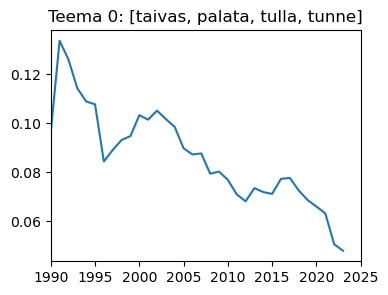

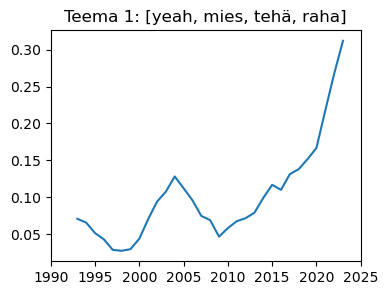

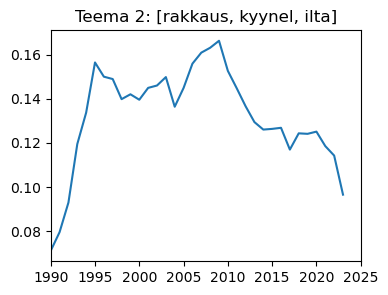

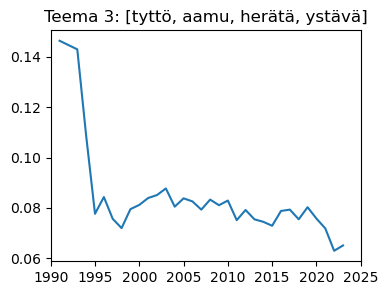

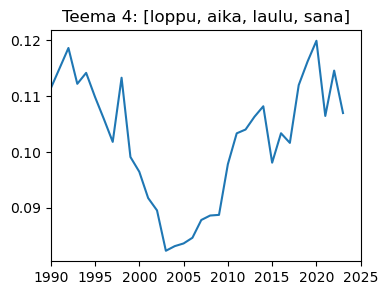

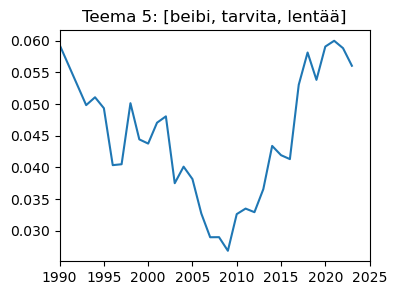

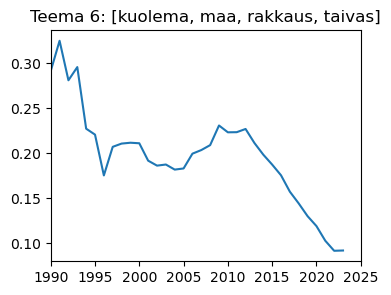

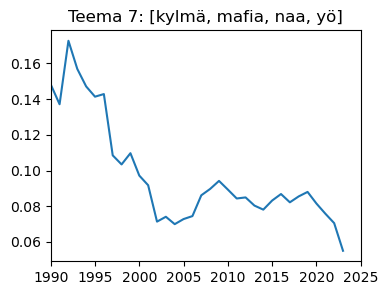

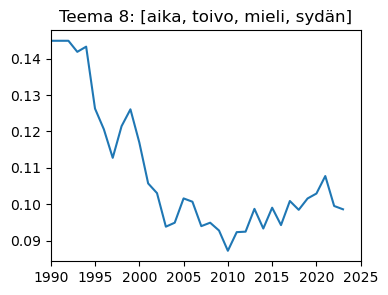

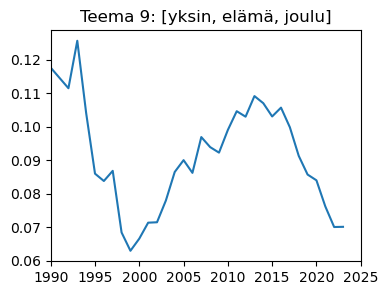

In [334]:
def plot_popularity(topic_num):
    topic_txt = topicdict_long[topic_num]
    df = themes_timeline_df[themes_timeline_df["topic"]==topic_num]
    df.loc[:,'ma'] = df.popularity.rolling(5).mean()
    df = df[df["year"]>=1990]
    plt.figure(figsize=(4,3))
    plt.plot(df["year"], df["ma"])
    plt.title(f"Teema {topic_num}: [{topic_txt}]")
    plt.xlim(1990,2025)

for i in range(0,10):
    plot_popularity(i)

C:\Users\pyryp\AppData\Local\Temp\ipykernel_20020\1066900129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'ma'] = df.popularity.rolling(5).mean()
C:\Users\pyryp\AppData\Local\Temp\ipykernel_20020\1066900129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'ma'] = df.popularity.rolling(5).mean()
C:\Users\pyryp\AppData\Local\Temp\ipykernel_20020\1066900129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

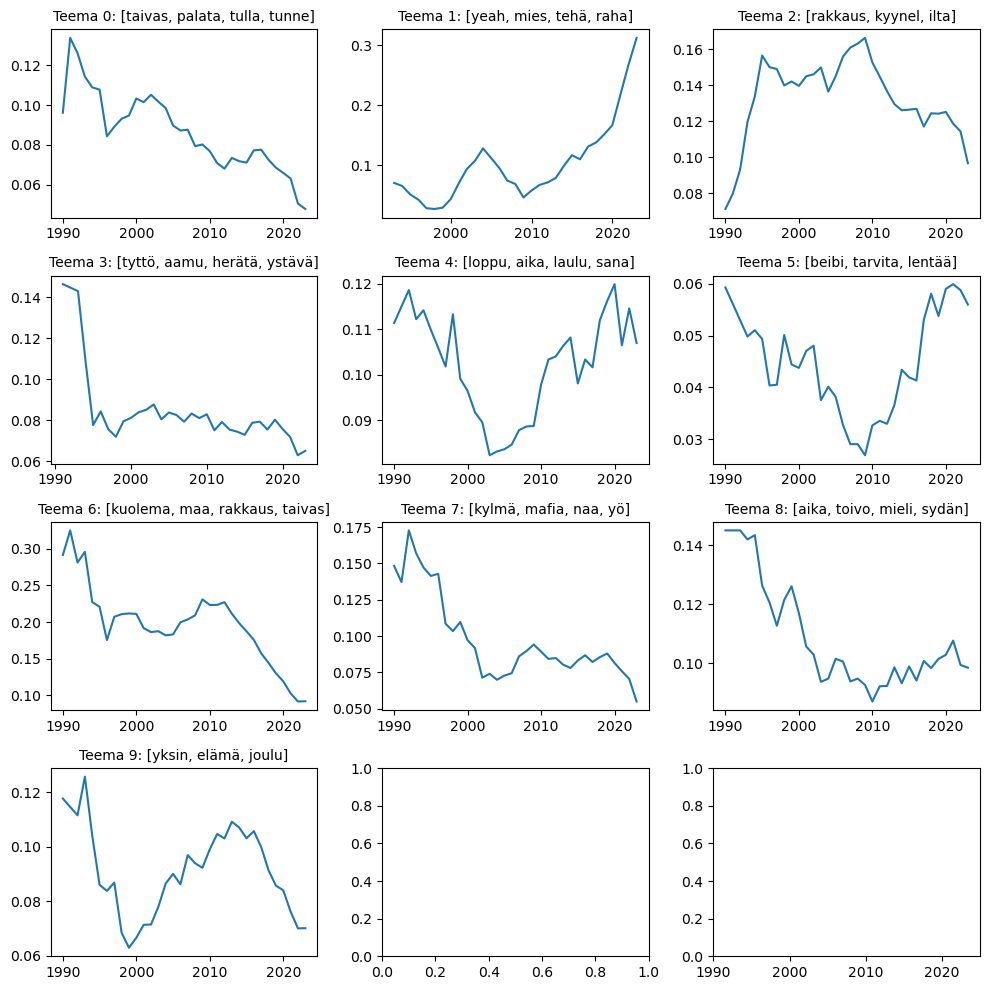

In [333]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

for i in range(0,10):
    topic_num = i
    topic_txt = topicdict_long[topic_num]
    df = themes_timeline_df[themes_timeline_df["topic"]==topic_num]
    df.loc[:,'ma'] = df.popularity.rolling(5).mean()
    df = df[df["year"]>=1990]

    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.plot(df["year"], df["ma"])
    ax.set_title(f"Teema {topic_num}: [{topic_txt}]", fontsize=10)
    plt.xlim(1990,2025)

plt.tight_layout()

C:\Users\pyryp\AppData\Local\Temp\ipykernel_20020\1915918495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'ma'] = df.popularity.rolling(5).mean()
C:\Users\pyryp\AppData\Local\Temp\ipykernel_20020\1915918495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'ma'] = df.popularity.rolling(5).mean()
C:\Users\pyryp\AppData\Local\Temp\ipykernel_20020\1915918495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

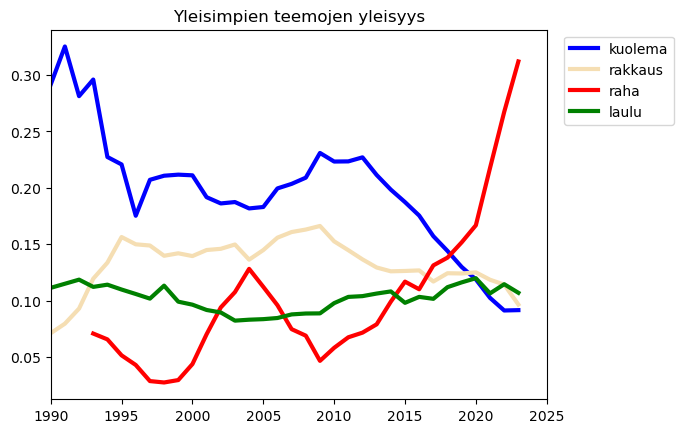

In [312]:
def plot_popularity_compare(topic_num, c):
    topic_txt = topicdict_long[topic_num]
    topic_txt_short = topicdict[topic_num]
    df = themes_timeline_df[themes_timeline_df["topic"]==topic_num]
    df.loc[:,'ma'] = df.popularity.rolling(5).mean()
    df = df[df["year"]>=1990]
    plt.plot(df["year"], df["ma"], label=topic_txt_short, linewidth=3, color=c)
    plt.title("Yleisimpien teemojen yleisyys")
    plt.xlim(1990,2025)

colors = ["blue", "wheat", "red", "green"]

for i, topic in enumerate([6,2,1,4]):
    c = colors[i]
    plot_popularity_compare(topic, c)

plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1))

#### Decades

In [244]:
themes_timeline_df_decade = lyrics_df_tokens.groupby([pd.cut(lyrics_df_tokens.year, [1990, 2000, 2010, 2020, 2025]), "topic"])["song_title"].count().reset_index().rename(columns={"song_title":"count"})
themes_timeline_df_decade["year"] = themes_timeline_df_decade["year"].astype(str).apply(lambda x: x[1:5]).astype(int)
themes_timeline_df_decade["sum"] = themes_timeline_df_decade.groupby("year")["count"].transform("sum")
themes_timeline_df_decade["popularity"] = themes_timeline_df_decade["count"] / themes_timeline_df_decade["sum"]
themes_timeline_df_decade

year  topic  count   sum  popularity
0   1990      0     99   993    0.099698
1   1990      1     40   993    0.040282
2   1990      2    148   993    0.149043
3   1990      3     79   993    0.079557
4   1990      4     96   993    0.096677
5   1990      5     39   993    0.039275
6   1990      6    207   993    0.208459
7   1990      7    101   993    0.101712
8   1990      8    114   993    0.114804
9   1990      9     70   993    0.070493
10  2000      0    240  2944    0.081522
11  2000      1    238  2944    0.080842
12  2000      2    437  2944    0.148438
13  2000      3    246  2944    0.083560
14  2000      4    273  2944    0.092731
15  2000      5    100  2944    0.033967
16  2000      6    611  2944    0.207541
17  2000      7    242  2944    0.082201
18  2000      8    276  2944    0.093750
19  2000      9    281  2944    0.095448
20  2010      0    255  3730    0.068365
21  2010      1    521  3730    0.139678
22  2010      2    470  3730    0.126005
23  2010      3    278  3730    0.074531
24  2010      4    406  3730    0.108847
25  2010      5    181  3730    0.048525
26  2010      6    580  3730    0.155496
27  2010      7    305  3730    0.081769
28  2010      8    379  3730    0.101609
29  2010      9    355  3730    0.095174
30  2020      0     39   858    0.045455
31  2020      1    320   858    0.372960
32  2020      2     65   858    0.075758
33  2020      3     52   858    0.060606
34  2020      4     86   858    0.100233
35  2020      5     49   858    0.057110
36  2020      6     66   858    0.076923
37  2020      7     43   858    0.050117
38  2020      8     78   858    0.090909
39  2020      9     60   858    0.069930

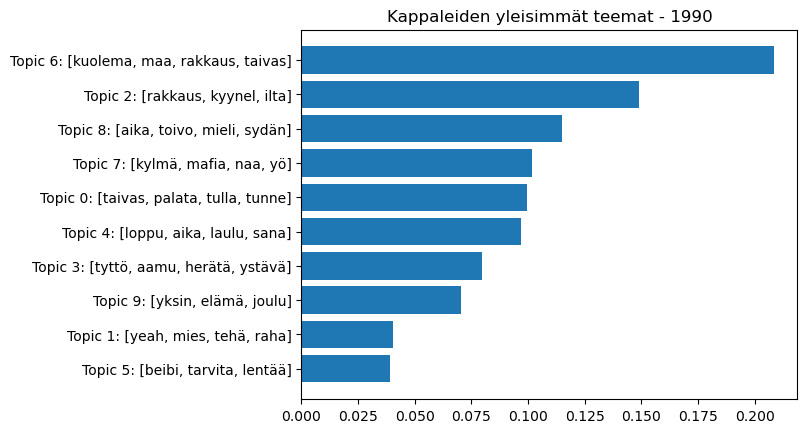

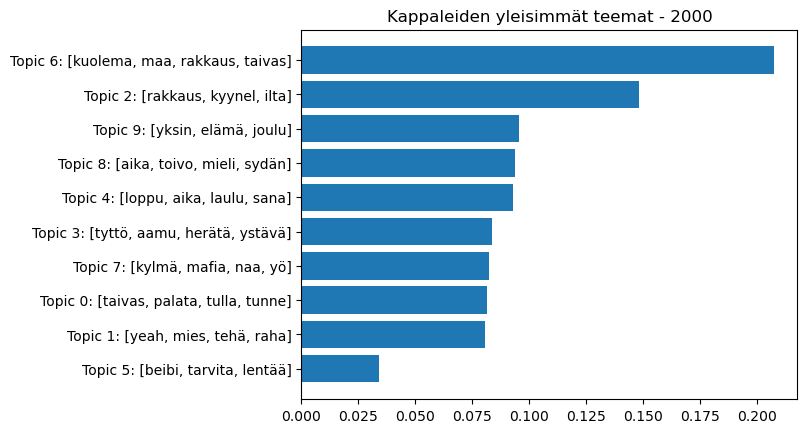

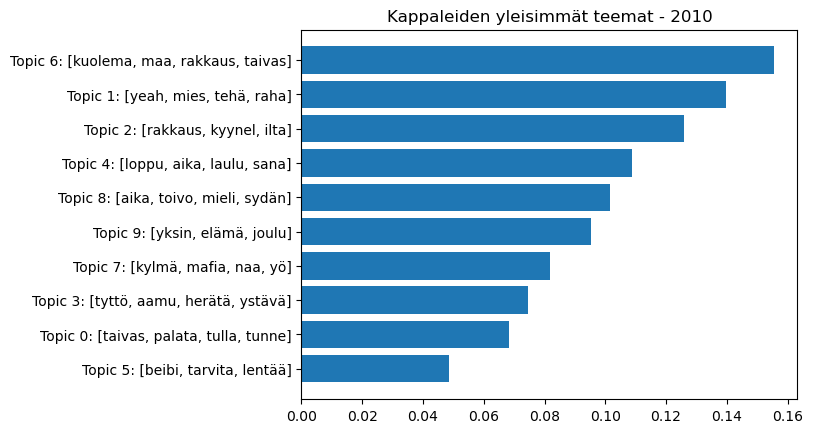

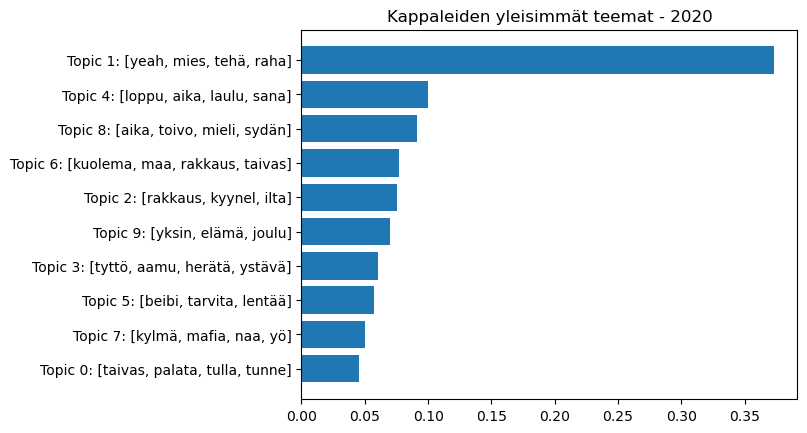

In [271]:
def themes_by_decade(vuosi):
    df = themes_timeline_df_decade[themes_timeline_df_decade["year"]==vuosi][["topic", "popularity"]]
    df["topic_txt"] = df["topic"].map(topicdict_long)
    df["topic_num_str"] = df["topic"].astype(str)
    df["print_txt"] = "Topic " + df["topic_num_str"] + ": [" + df["topic_txt"] + "]"
    df = df.sort_values("popularity").reset_index(drop=True)
    plt.figure()
    plt.barh(df["print_txt"], df["popularity"])
    plt.title(f"Kappaleiden yleisimmät teemat - {vuosi}")

for decade in [1990,2000,2010,2020]:
    themes_by_decade(decade)

## Keywords

In [126]:
lyrics_df["love"] = lyrics_df["lyrics"].apply(lambda x: "rakkau" in x or "rakas" in x)
lyrics_df

artist               song_title  year  \
2     2-Times-Terror  Equals-One-Sudden-Death  2010   
3     2-Times-Terror  Equals-One-Sudden-Death  2010   
5     2-Times-Terror  Equals-One-Sudden-Death  2010   
7     2-Times-Terror  Equals-One-Sudden-Death  2010   
8           51koodia           Mustat-sydamet  2008   
...              ...                      ...   ...   
9029             Yup                Yovieraat  1996   
9030             Yup                Yovieraat  1996   
9031             Yup                Yovieraat  1996   
9032             Yup                Yovieraat  1996   
9033             Yup                Yovieraat  1996   

                                                 lyrics lang   love  5yrs  
2     haureudessa rypenyt vartalo karttaa laulua kun...   fi  False  2005  
3     sorkat kohti kattoa! sorkat kohti kattoa! viim...   fi  False  2005  
5     pyörivät päät diktaattorien vallananastaja tui...   fi  False  2005  
7     ihoni on läpinäkyvä ja kylmä* näen sisäelimeni...   fi  False  2005  
8     hei, oletko yksi heistä joka eksyi maailmaan, ...   fi  False  2005  
...                                                 ...  ...    ...   ...  
9029  kätilö kehaisi ensisynnyttäjää potra poikalaps...   fi  False  1995  
9030  ilta on tummuva merkit on taivaalla täysikuu t...   fi  False  1995  
9031   kartanonne on linnanne  näin vieraamme vitsai...   fi  False  1995  
9032   rock'n'rollin kuningas on kuollut  sanotaan  ...   fi   True  1995  
9033  keijo-kettu viiden pennin petkuttaja sellin ka...   fi   True  1995  

[8756 rows x 7 columns]

In [130]:
lyrics_df["love"] = lyrics_df["love"].replace(True, 1)
lyrics_df["love"] = lyrics_df["love"].replace(False, 0)
lyrics_df = lyrics_df[lyrics_df["5yrs"]!=0].reset_index()
lyrics_df

index          artist               song_title  year  \
0         2  2-Times-Terror  Equals-One-Sudden-Death  2010   
1         3  2-Times-Terror  Equals-One-Sudden-Death  2010   
2         5  2-Times-Terror  Equals-One-Sudden-Death  2010   
3         7  2-Times-Terror  Equals-One-Sudden-Death  2010   
4         8        51koodia           Mustat-sydamet  2008   
...     ...             ...                      ...   ...   
8567   9029             Yup                Yovieraat  1996   
8568   9030             Yup                Yovieraat  1996   
8569   9031             Yup                Yovieraat  1996   
8570   9032             Yup                Yovieraat  1996   
8571   9033             Yup                Yovieraat  1996   

                                                 lyrics lang  love  5yrs  
0     haureudessa rypenyt vartalo karttaa laulua kun...   fi     0  2005  
1     sorkat kohti kattoa! sorkat kohti kattoa! viim...   fi     0  2005  
2     pyörivät päät diktaattorien vallananastaja tui...   fi     0  2005  
3     ihoni on läpinäkyvä ja kylmä* näen sisäelimeni...   fi     0  2005  
4     hei, oletko yksi heistä joka eksyi maailmaan, ...   fi     0  2005  
...                                                 ...  ...   ...   ...  
8567  kätilö kehaisi ensisynnyttäjää potra poikalaps...   fi     0  1995  
8568  ilta on tummuva merkit on taivaalla täysikuu t...   fi     0  1995  
8569   kartanonne on linnanne  näin vieraamme vitsai...   fi     0  1995  
8570   rock'n'rollin kuningas on kuollut  sanotaan  ...   fi     1  1995  
8571  keijo-kettu viiden pennin petkuttaja sellin ka...   fi     1  1995  

[8572 rows x 8 columns]

Text(0.5, 1.0, 'Rakkaus-esiintyvyys')

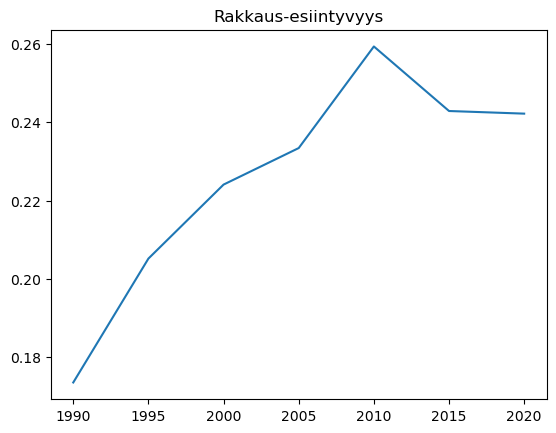

In [136]:
df = lyrics_df.groupby("5yrs")["love"].mean().reset_index()

plt.plot(df["5yrs"], df["love"])
plt.title("Rakkaus-esiintyvyys")

Text(0.5, 1.0, 'Jumala-esiintyvyys')

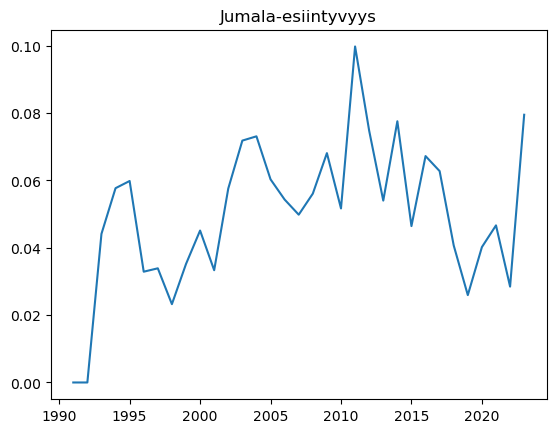

In [142]:
lyrics_df["jumala"] = lyrics_df["lyrics"].apply(lambda x: "jumal" in x)
lyrics_df["jumala"] = lyrics_df["jumala"].replace(True, 1)
lyrics_df["jumala"] = lyrics_df["jumala"].replace(False, 0)
# lyrics_df = lyrics_df[lyrics_df["5yrs"]!=0].reset_index()

df = lyrics_df.groupby("year")["jumala"].mean().reset_index()
plt.plot(df["year"], df["jumala"])
plt.title("Jumala-esiintyvyys")

In [200]:
def sanan_esiintyvyys(sana, mode="year"):
    df = lyrics_df.copy()
    df["sana"] = df["lyrics"].apply(lambda x: sana in x)
    df["sana"] = df["sana"].replace(True, 1)
    df["sana"] = df["sana"].replace(False, 0)
    # df = df[df["5yrs"]!=0].reset_index()

    if mode=="year":
        df2 = df.groupby("year")["sana"].mean().reset_index()
        plt.plot(df2["year"], df2["sana"])
        plt.title(f"{sana}-esiintyvyys")
    elif mode=="5yrs":
        df2 = df.groupby("5yrs")["sana"].mean().reset_index()
        plt.plot(df2["5yrs"], df2["sana"])
        plt.title(f"{sana}-esiintyvyys")    
    else:
        None

In [180]:
def sanan_esiintyvyys_vertaa(sana, sana2, mode="year"):
    df = lyrics_df.copy()
    df["sana"] = df["lyrics"].apply(lambda x: sana in x)
    df["sana"] = df["sana"].replace(True, 1)
    df["sana"] = df["sana"].replace(False, 0)

    df["sana2"] = df["lyrics"].apply(lambda x: sana2 in x)
    df["sana2"] = df["sana2"].replace(True, 1)
    df["sana2"] = df["sana2"].replace(False, 0)
    # df = df[df["5yrs"]!=0].reset_index()



    df2 = df.groupby(mode).agg({"sana":"mean", "sana2":"mean"}).reset_index()

    fig, ax1 = plt.subplots()
    ln1 = ax1.plot(df2[mode], df2["sana"], label=sana)
    ax2 = ax1.twinx()
    ln2 = ax2.plot(df2[mode], df2["sana2"], color="red", label=sana2)

    lns = ln1+ln2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0)

    plt.title(f"{sana} ja {sana2} -esiintyvyys")

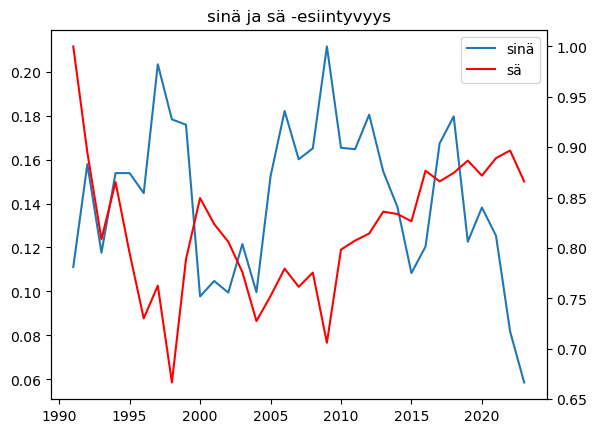

In [181]:
sanan_esiintyvyys_vertaa("sinä", "sä")

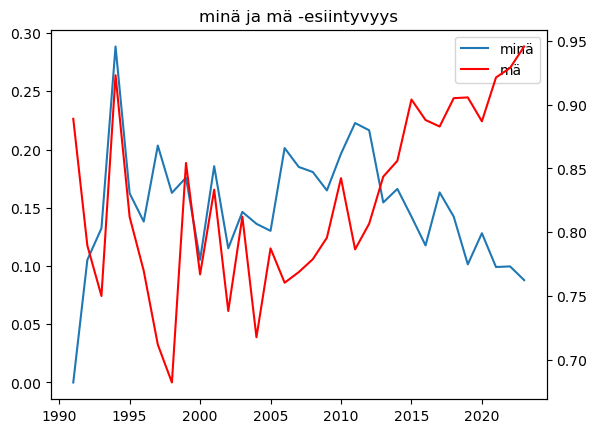

In [182]:
sanan_esiintyvyys_vertaa("minä", "mä")

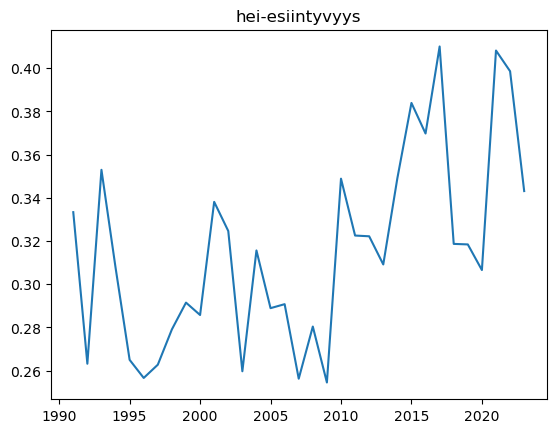

In [201]:
sanan_esiintyvyys("hei")

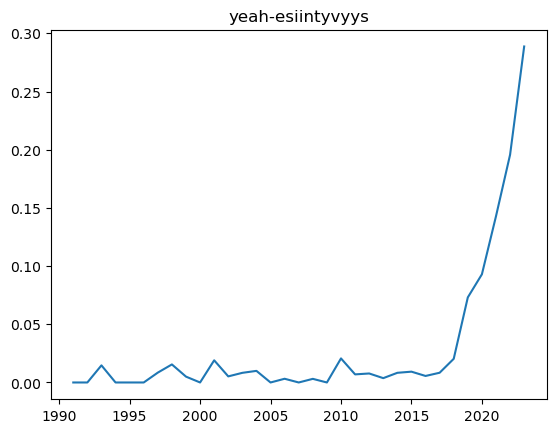

In [202]:
sanan_esiintyvyys("yeah")

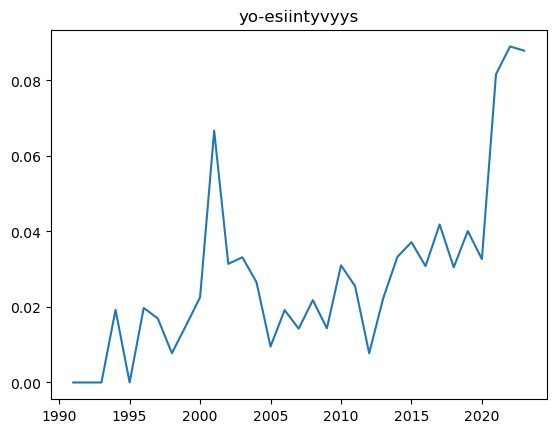

In [203]:
sanan_esiintyvyys("yo")

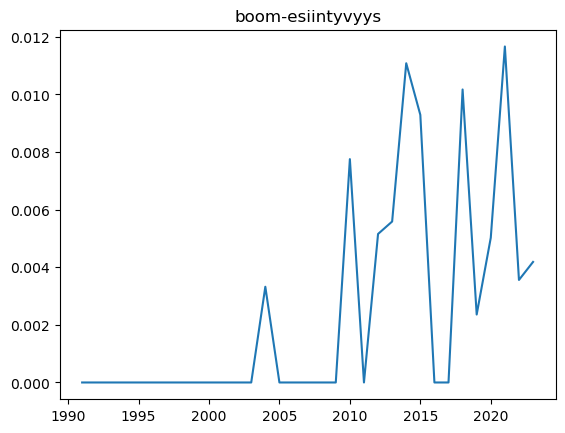

In [204]:
sanan_esiintyvyys("boom")

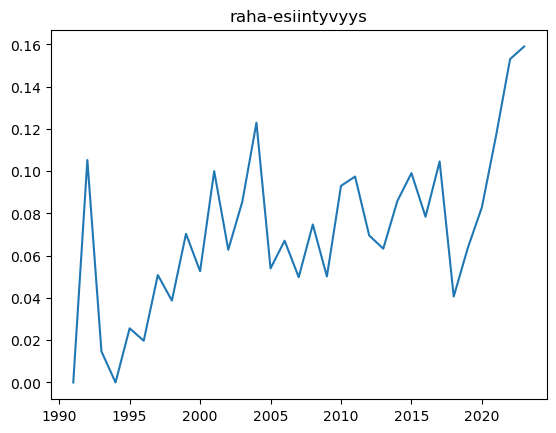

In [219]:
sanan_esiintyvyys("raha")

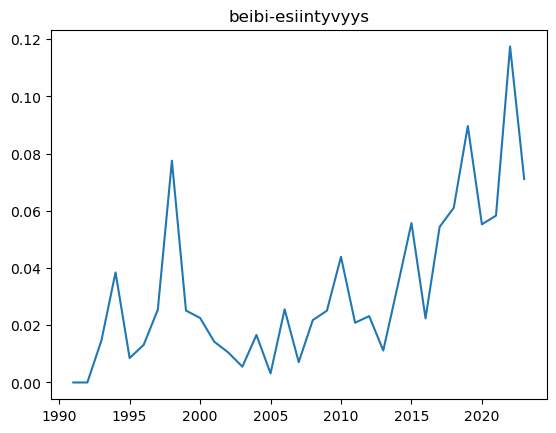

In [220]:
sanan_esiintyvyys("beibi")

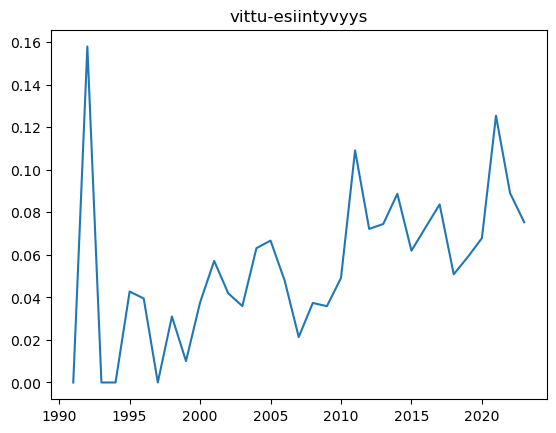

In [259]:
sanan_esiintyvyys("vittu")

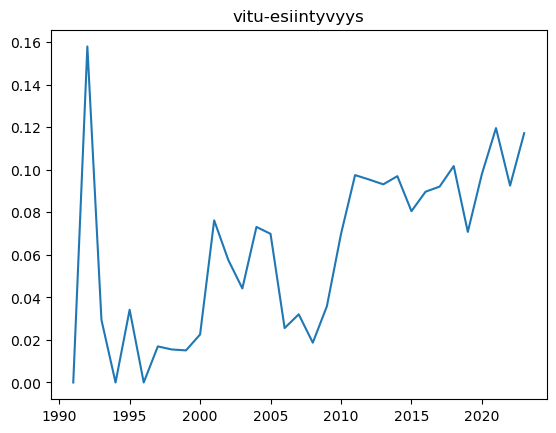

In [260]:
sanan_esiintyvyys("vitu")

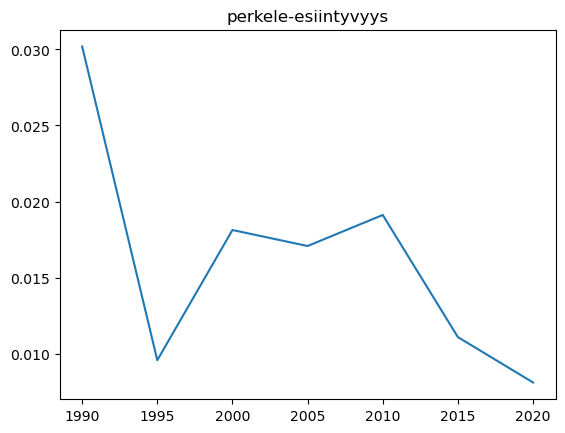

In [262]:
sanan_esiintyvyys("perkele", mode="5yrs")

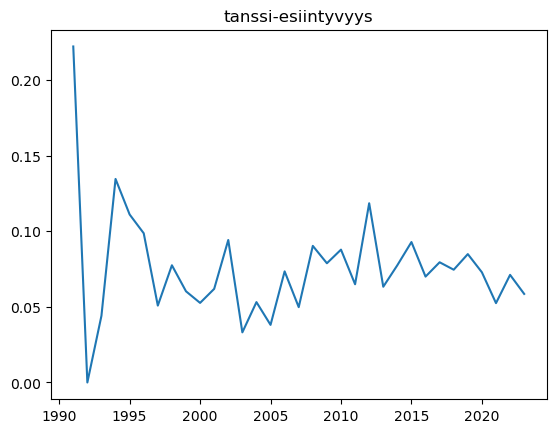

In [263]:
sanan_esiintyvyys("tanssi")

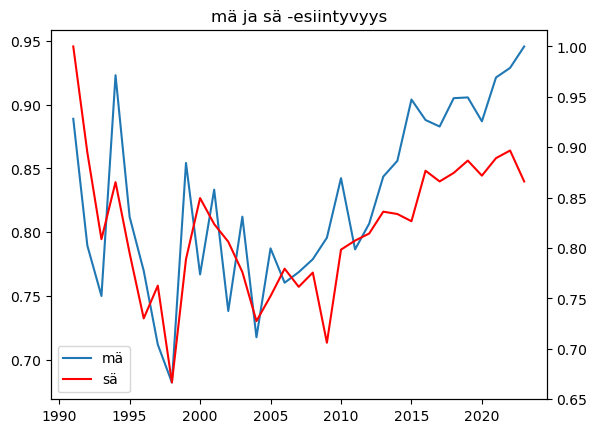

In [268]:
sanan_esiintyvyys_vertaa("mä", "sä")

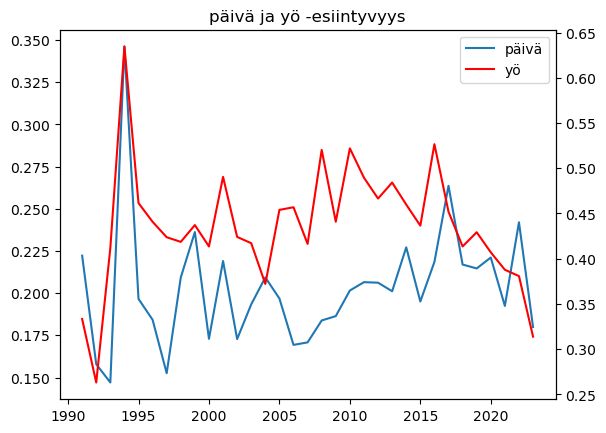

In [271]:
sanan_esiintyvyys_vertaa("päivä", "yö")

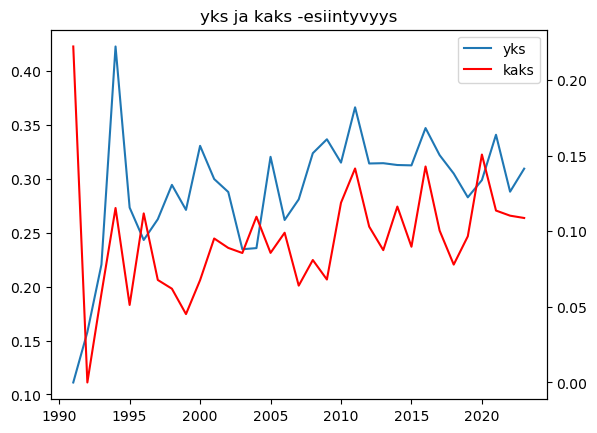

In [279]:
sanan_esiintyvyys_vertaa("yks", "kaks")

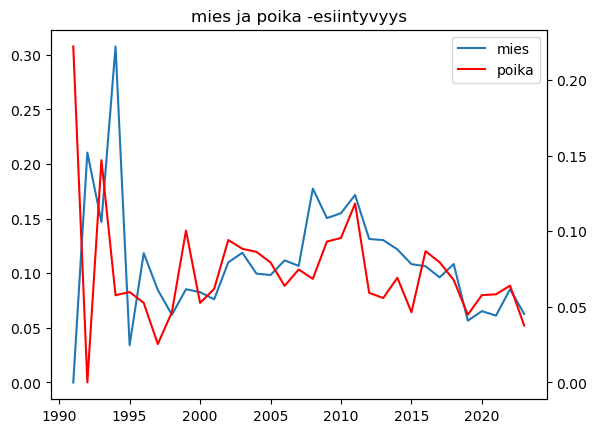

In [291]:
sanan_esiintyvyys_vertaa("mies","poika")

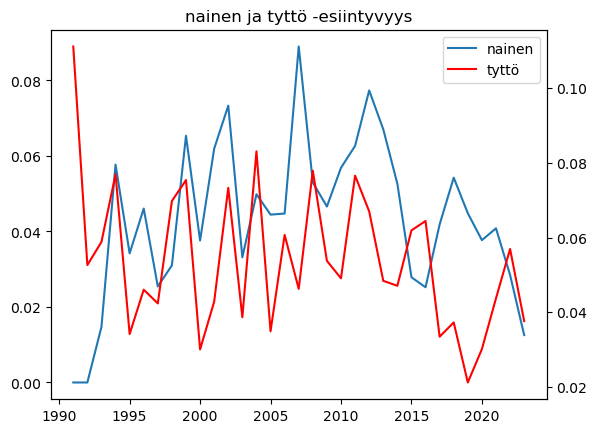

In [292]:
sanan_esiintyvyys_vertaa("nainen","tyttö")

In [1]:
sanan_esiintyvyys_vertaa("nainen","muija")

NameError: name 'sanan_esiintyvyys_vertaa' is not defined

# Kappaleiden pituudet

In [457]:
lyrics_df["len"] = lyrics_df["lyrics"].apply(lambda x: len(x.split(" ")))
lyrics_df

artist               song_title  year  \
2     2-Times-Terror  Equals-One-Sudden-Death  2010   
3     2-Times-Terror  Equals-One-Sudden-Death  2010   
5     2-Times-Terror  Equals-One-Sudden-Death  2010   
7     2-Times-Terror  Equals-One-Sudden-Death  2010   
8           51koodia           Mustat-sydamet  2008   
...              ...                      ...   ...   
9029             Yup                Yovieraat  1996   
9030             Yup                Yovieraat  1996   
9031             Yup                Yovieraat  1996   
9032             Yup                Yovieraat  1996   
9033             Yup                Yovieraat  1996   

                                                 lyrics lang  len  
2     haureudessa rypenyt vartalo karttaa laulua kun...   fi  140  
3     sorkat kohti kattoa! sorkat kohti kattoa! viim...   fi  158  
5     pyörivät päät diktaattorien vallananastaja tui...   fi   91  
7     ihoni on läpinäkyvä ja kylmä* näen sisäelimeni...   fi  143  
8     hei, oletko yksi heistä joka eksyi maailmaan, ...   fi  149  
...                                                 ...  ...  ...  
9029  kätilö kehaisi ensisynnyttäjää potra poikalaps...   fi  244  
9030  ilta on tummuva merkit on taivaalla täysikuu t...   fi  245  
9031   kartanonne on linnanne  näin vieraamme vitsai...   fi  198  
9032   rock'n'rollin kuningas on kuollut  sanotaan  ...   fi  218  
9033  keijo-kettu viiden pennin petkuttaja sellin ka...   fi  222  

[8756 rows x 6 columns]

In [458]:
lyrics_len = lyrics_df.groupby("year")["len"].mean().reset_index()

Text(0.5, 1.0, 'Kappaleiden pituus sanoina keskimäärin')

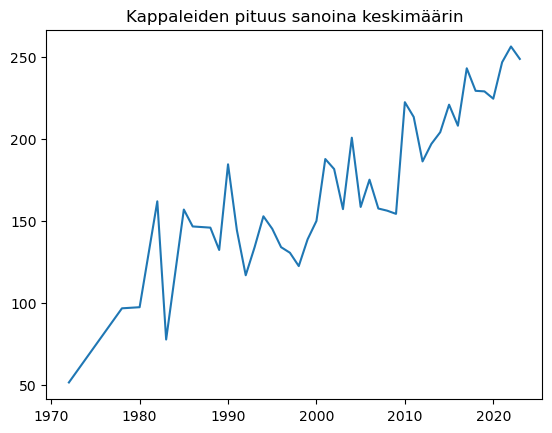

In [459]:
plt.plot(lyrics_len["year"], lyrics_len["len"])
plt.title("Kappaleiden pituus sanoina keskimäärin")

# Lexical diversity

In [460]:
lyrics_df["ttr"] = lyrics_df["lyrics"].apply(lambda x: ld.ttr(ld.tokenize(x)))
lyrics_df

artist               song_title  year  \
2     2-Times-Terror  Equals-One-Sudden-Death  2010   
3     2-Times-Terror  Equals-One-Sudden-Death  2010   
5     2-Times-Terror  Equals-One-Sudden-Death  2010   
7     2-Times-Terror  Equals-One-Sudden-Death  2010   
8           51koodia           Mustat-sydamet  2008   
...              ...                      ...   ...   
9029             Yup                Yovieraat  1996   
9030             Yup                Yovieraat  1996   
9031             Yup                Yovieraat  1996   
9032             Yup                Yovieraat  1996   
9033             Yup                Yovieraat  1996   

                                                 lyrics lang  len       ttr  
2     haureudessa rypenyt vartalo karttaa laulua kun...   fi  140  0.600000  
3     sorkat kohti kattoa! sorkat kohti kattoa! viim...   fi  158  0.626582  
5     pyörivät päät diktaattorien vallananastaja tui...   fi   91  0.615385  
7     ihoni on läpinäkyvä ja kylmä* näen sisäelimeni...   fi  143  0.496503  
8     hei, oletko yksi heistä joka eksyi maailmaan, ...   fi  149  0.558621  
...                                                 ...  ...  ...       ...  
9029  kätilö kehaisi ensisynnyttäjää potra poikalaps...   fi  244  0.715481  
9030  ilta on tummuva merkit on taivaalla täysikuu t...   fi  245  0.346939  
9031   kartanonne on linnanne  näin vieraamme vitsai...   fi  198  0.530612  
9032   rock'n'rollin kuningas on kuollut  sanotaan  ...   fi  218  0.575610  
9033  keijo-kettu viiden pennin petkuttaja sellin ka...   fi  222  0.599099  

[8756 rows x 7 columns]

In [463]:
lyrics_ttr = lyrics_df.groupby("year")["ttr"].mean().reset_index()
lyrics_ttr = lyrics_ttr[lyrics_ttr["year"]>=1990]

Text(0.5, 1.0, 'Sanojen monimuotoisuus keskimäärin')

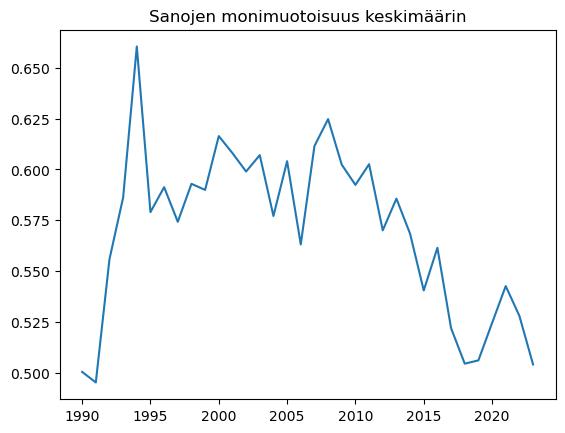

In [464]:
plt.plot(lyrics_ttr["year"], lyrics_ttr["ttr"])
plt.title("Sanojen monimuotoisuus keskimäärin")